# Purpose of the Udacity Data Analyst Nanodegree Machine Learning Project

This project's goal is to build an algorithm (and data workflow) that can predict whether a person from our Enron emails and financial data was likely a Person of Interest (POI) in the investigation of Enron's fraud. We have a manually developed list of POIs, provided by Udacity and created from news reports at the time, that represents ground truth and that we can use for testing purposes (this ground truth is represented within the data already as the value for `poi`).

As part of this project, there are a series of questions that I'll answer to show how I'm thinking about this and what direction I've taken my analysis.

# The Data

The data provided are not (as I had originally expected) based upon the text corpus of all the emails, but rather are high-level summary data aggregated at the individual person level. Specifically, for each of the 146 people for whom we have data, the data are represented by a single dictionary in python, with the top-level keys of the dict being the name of each person in the data set in the format `"LastName FirstName MiddleInitial"`. For each person, their data are organized in three primary categories (the strings shown here are all dictionary keys for the dictionary associated with a person's name, with the values for each of these lower-level dict keys being the value of that item, e.g. salary - this text is taken from the Udacity project details page):

1. **Financial features:** `['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees']` (all units are in US dollars)

2. **Email features:** `['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']` (units are generally number of emails messages and therefore integers; notable exception is ‘email_address’, which is a text string)

3. **POI label:** `[‘poi’]` (boolean, represented as integer 0 or 1)

## Data Importing and Formatting

Since the project assumes we'll be manipulating data in a dictionary format and I'd like to work in a pandas DataFrame, I'll need to use some of the pre-made code from the project to get the data into the DataFrame format I know and love.

In [1]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

#Let's grab all of the features so we can explore them a bit before deciding which ones to keep.
features_list = ['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 
                 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 
                 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 
                 'restricted_stock', 'director_fees', 
                 'to_messages', 'email_address', 'from_poi_to_this_person', 
                 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] 

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
data_dict

/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

In [2]:
import pandas as pd

df = pd.DataFrame.from_dict(data_dict, orient = 'index')
df

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN
BAZELIDES PHILIP J,80818,NaN,684694,860136,1599641,NaN,NaN,NaN,NaN,1599641,...,NaN,NaN,874,NaN,False,NaN,NaN,93750,NaN,NaN
BECK SALLY W,231330,7315,NaN,969068,NaN,700000,126027,2639,NaN,126027,...,NaN,4343,566,386,False,NaN,NaN,NaN,sally.beck@enron.com,144
BELDEN TIMOTHY N,213999,7991,2144013,5501630,953136,5249999,157569,5521,NaN,1110705,...,NaN,484,210698,108,True,NaN,-2334434,NaN,tim.belden@enron.com,228
BELFER ROBERT,NaN,NaN,-102500,102500,3285,NaN,NaN,NaN,44093,-44093,...,NaN,NaN,NaN,NaN,False,3285,NaN,NaN,NaN,NaN
BERBERIAN DAVID,216582,NaN,NaN,228474,1624396,NaN,869220,NaN,NaN,2493616,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,david.berberian@enron.com,NaN


Null values are currently being indicated as `"NaN"` instead of as `np.NaN` and as a result any of our typical `isnull()` approaches won't work and other methods/functions won't be able to automatically ignore these values either. Let's fix this!

In [3]:
import numpy as np

#Replace "NaN" with np.NaN
df.replace(to_replace = "NaN", value = np.NaN, inplace = True)
df.index.rename("Name", inplace = True)
df

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
Name,,,,,,,,,,,,,,,,,,,,,
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,...,NaN,2195.0,152.0,65.0,False,NaN,-3081055.0,304805.0,phillip.allen@enron.com,47.0
BADUM JAMES P,NaN,NaN,178980.0,182466.0,257817.0,NaN,NaN,NaN,NaN,257817.0,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,4046157.0,NaN,1757552.0,465.0,-560222.0,5243487.0,...,NaN,29.0,864523.0,0.0,False,NaN,-5104.0,NaN,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,NaN,NaN,10623258.0,...,NaN,NaN,2660303.0,NaN,False,NaN,-1386055.0,1586055.0,NaN,NaN
BAY FRANKLIN R,239671.0,NaN,260455.0,827696.0,NaN,400000.0,145796.0,NaN,-82782.0,63014.0,...,NaN,NaN,69.0,NaN,False,NaN,-201641.0,NaN,frank.bay@enron.com,NaN
BAZELIDES PHILIP J,80818.0,NaN,684694.0,860136.0,1599641.0,NaN,NaN,NaN,NaN,1599641.0,...,NaN,NaN,874.0,NaN,False,NaN,NaN,93750.0,NaN,NaN
BECK SALLY W,231330.0,7315.0,NaN,969068.0,NaN,700000.0,126027.0,2639.0,NaN,126027.0,...,NaN,4343.0,566.0,386.0,False,NaN,NaN,NaN,sally.beck@enron.com,144.0
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,NaN,1110705.0,...,NaN,484.0,210698.0,108.0,True,NaN,-2334434.0,NaN,tim.belden@enron.com,228.0
BELFER ROBERT,NaN,NaN,-102500.0,102500.0,3285.0,NaN,NaN,NaN,44093.0,-44093.0,...,NaN,NaN,NaN,NaN,False,3285.0,NaN,NaN,NaN,NaN


# Exploratory Data Analysis (EDA)

## Cleaning and Counting
Here we'll take a look at the null values, make sure the signs of the data are all correct and meaningful, and do other basic cleaning to make sure these data can be processed easily.

In [4]:
#How many null values in total df?
print "Number of null/NaN/etc. values in dataframe =", df.isnull().sum().sum()

#How many rows (with total of 21 columns) are totally null?
print "Number of rows with ONLY null/NaN/etc. values in dataframe =", df.isnull().all(axis = 0).sum()

#How many columns (with 146 rows) are totally null?
print "Number of columns with ONLY null/NaN/etc. values in dataframe =", df.isnull().all(axis = 1).sum()

Number of null/NaN/etc. values in dataframe = 1358
Number of rows with ONLY null/NaN/etc. values in dataframe = 0
Number of columns with ONLY null/NaN/etc. values in dataframe = 0


Do we have any records/people with a large fraction of null values?

In [5]:
#How many nulls are there per row as a percentage of all the available features?
(df.isnull().sum(axis = 1)/len(df.columns)).sort_values(ascending = False)

Name
LOCKHART EUGENE E                0.952381
GRAMM WENDY L                    0.857143
WROBEL BRUCE                     0.857143
WHALEY DAVID A                   0.857143
THE TRAVEL AGENCY IN THE PARK    0.857143
WAKEHAM JOHN                     0.809524
WODRASKA JOHN                    0.809524
CLINE KENNETH W                  0.809524
GILLIS JOHN                      0.809524
SCRIMSHAW MATTHEW                0.809524
SAVAGE FRANK                     0.809524
MENDELSOHN JOHN                  0.761905
YEAP SOON                        0.761905
CHRISTODOULOU DIOMEDES           0.761905
PEREIRA PAULO V. FERRAZ          0.761905
BLAKE JR. NORMAN P               0.761905
LOWRY CHARLES P                  0.761905
CHAN RONNIE                      0.761905
MEYER JEROME J                   0.761905
GATHMANN WILLIAM D               0.761905
WINOKUR JR. HERBERT S            0.761905
FUGH JOHN L                      0.761905
URQUHART JOHN A                  0.761905
NOLES JAMES L                

**Whoa.** There are a lot of people in this data set that have more than 75% null features (~16 out of 21 features missing). When you consider that a number of the features are also highly correlated most likely (e.g. it looks like some of these are debits that match income in other features), this isn't a lot to go on. Ultimately, I'm going to keep these records, as we really don't have a lot of data to work with already, but I'll definitely consider coming back and trimming out these records if they're dragging down precision and recall.

In [6]:
#How many nulls are there per column as a percentage of all the people for whom we have records?
(df.isnull().sum(axis = 0)/len(df)).sort_values(ascending = False)

loan_advances                0.972603
director_fees                0.883562
restricted_stock_deferred    0.876712
deferral_payments            0.732877
deferred_income              0.664384
long_term_incentive          0.547945
bonus                        0.438356
from_poi_to_this_person      0.410959
shared_receipt_with_poi      0.410959
to_messages                  0.410959
from_this_person_to_poi      0.410959
from_messages                0.410959
other                        0.363014
expenses                     0.349315
salary                       0.349315
exercised_stock_options      0.301370
restricted_stock             0.246575
email_address                0.239726
total_payments               0.143836
total_stock_value            0.136986
poi                          0.000000
dtype: float64

**It looks like we know very little about loan advances, director fees, and deferred restricted stock.** Each of these features has more than 85% of its records as null values, which translates to less than 29 records actually being non-null. I'm going to drop these features entirely due to the lack of data points and the likelihood that any classifier is going to provide those with little or no weight, but the rest I'll keep. I'll also store a copy of the DataFrame with those features still included, just so I can make sure to compare the results when doing feature selection tests (e.g. `SelectKBest`) later and make sure I haven't made a bad choice.

Given that we have no records with no missing values, and none of our features (with the exception of `poi`) are completely non-null, there aren't a lot of options here. Often missing values can be dealt with via listwise deletion wherein the records with any null values are removed, but that would remove all of our data from this data set and is thus unacceptable. While statistical (e.g. regression-based) or machine-learning-based methods for imputation could be utilized, I'd rather compare the performance of our selected model when keeping all values, removing features with lots of missing values, and removing records with lots missing values first. If sufficient performance can be achieved in this manner, we'll consider our work done. But if we can't achieve sufficient performance via this combination of approaches, we'll consider alternative imputation techniques.

In [7]:
df_lowNull = df.drop(columns = ['loan_advances', 'director_fees', 'restricted_stock_deferred'])
df_lowNull

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,poi,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
Name,,,,,,,,,,,,,,,,,,
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,1729541.0,13868.0,2195.0,152.0,65.0,False,-3081055.0,304805.0,phillip.allen@enron.com,47.0
BADUM JAMES P,NaN,NaN,178980.0,182466.0,257817.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,4046157.0,NaN,1757552.0,465.0,5243487.0,56301.0,29.0,864523.0,0.0,False,-5104.0,NaN,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,NaN,10623258.0,11200.0,NaN,2660303.0,NaN,False,-1386055.0,1586055.0,NaN,NaN
BAY FRANKLIN R,239671.0,NaN,260455.0,827696.0,NaN,400000.0,145796.0,NaN,63014.0,129142.0,NaN,69.0,NaN,False,-201641.0,NaN,frank.bay@enron.com,NaN
BAZELIDES PHILIP J,80818.0,NaN,684694.0,860136.0,1599641.0,NaN,NaN,NaN,1599641.0,NaN,NaN,874.0,NaN,False,NaN,93750.0,NaN,NaN
BECK SALLY W,231330.0,7315.0,NaN,969068.0,NaN,700000.0,126027.0,2639.0,126027.0,37172.0,4343.0,566.0,386.0,False,NaN,NaN,sally.beck@enron.com,144.0
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,1110705.0,17355.0,484.0,210698.0,108.0,True,-2334434.0,NaN,tim.belden@enron.com,228.0
BELFER ROBERT,NaN,NaN,-102500.0,102500.0,3285.0,NaN,NaN,NaN,-44093.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN


In [8]:
null_count = df.isnull().sum().sum()
#Treats all nonzero and np.nan values as True, so only zero values are counted as False
zero_count = df.size - df.astype(bool).sum().sum()

print "Fraction of all data points that are missing =", float(null_count + zero_count)/df.size



Fraction of all data points that are missing = 0.495107632094


**OK, so technically this isn't a sparse matrix** by traditional definitions (when considering both null and zero values). But it is certainly close! Still, that's good to know.

Let's also take a look at unique values in the columns. If a feature has only one value, it's not useful for predicting anything at all.

In [9]:
df.apply(pd.Series.nunique).sort_values()

poi                            2
loan_advances                  4
director_fees                 17
restricted_stock_deferred     18
deferral_payments             39
bonus                         41
from_this_person_to_poi       41
deferred_income               44
long_term_incentive           52
from_poi_to_this_person       57
from_messages                 64
shared_receipt_with_poi       83
to_messages                   86
other                         92
salary                        94
expenses                      94
restricted_stock              97
exercised_stock_options      101
email_address                111
total_stock_value            124
total_payments               125
dtype: int64

**The only items that stick out here are `poi`, which we know is our binary label and thus 2 is an appropriate value, and `loan_advances` which we already know is missing the vast majority of its data.** So nothing need be done here.

One last thing: **let's check to make sure that our index labels make sense.** Since this isn't a data set that I created myself, but rather the one given me by Udacity, let's make sure there aren't any non-sensical names for these records. Since this is a relatively small list, we'll just do a close-read to parse it.

In [10]:
df.index.values

array(['ALLEN PHILLIP K', 'BADUM JAMES P', 'BANNANTINE JAMES M',
       'BAXTER JOHN C', 'BAY FRANKLIN R', 'BAZELIDES PHILIP J',
       'BECK SALLY W', 'BELDEN TIMOTHY N', 'BELFER ROBERT',
       'BERBERIAN DAVID', 'BERGSIEKER RICHARD P', 'BHATNAGAR SANJAY',
       'BIBI PHILIPPE A', 'BLACHMAN JEREMY M', 'BLAKE JR. NORMAN P',
       'BOWEN JR RAYMOND M', 'BROWN MICHAEL', 'BUCHANAN HAROLD G',
       'BUTTS ROBERT H', 'BUY RICHARD B', 'CALGER CHRISTOPHER F',
       'CARTER REBECCA C', 'CAUSEY RICHARD A', 'CHAN RONNIE',
       'CHRISTODOULOU DIOMEDES', 'CLINE KENNETH W', 'COLWELL WESLEY',
       'CORDES WILLIAM R', 'COX DAVID', 'CUMBERLAND MICHAEL S',
       'DEFFNER JOSEPH M', 'DELAINEY DAVID W', 'DERRICK JR. JAMES V',
       'DETMERING TIMOTHY J', 'DIETRICH JANET R', 'DIMICHELE RICHARD G',
       'DODSON KEITH', 'DONAHUE JR JEFFREY M', 'DUNCAN JOHN H',
       'DURAN WILLIAM D', 'ECHOLS JOHN B', 'ELLIOTT STEVEN',
       'FALLON JAMES B', 'FASTOW ANDREW S', 'FITZGERALD JAY L',
       'FOW

**Well that doesn't seem quite right.** I'm going to make a leap of logic here and assume that `TOTAL` and `THE TRAVEL AGENCY IN THE PARK` aren't likely individual people and are thus less than helpful records. Let's take a quick look at their data.

In [11]:
df.loc['THE TRAVEL AGENCY IN THE PARK']

salary                          NaN
to_messages                     NaN
deferral_payments               NaN
total_payments               362096
exercised_stock_options         NaN
bonus                           NaN
restricted_stock                NaN
shared_receipt_with_poi         NaN
restricted_stock_deferred       NaN
total_stock_value               NaN
expenses                        NaN
loan_advances                   NaN
from_messages                   NaN
other                        362096
from_this_person_to_poi         NaN
poi                           False
director_fees                   NaN
deferred_income                 NaN
long_term_incentive             NaN
email_address                   NaN
from_poi_to_this_person         NaN
Name: THE TRAVEL AGENCY IN THE PARK, dtype: object

While it is possible, I suppose, that an organization as opposed to an entity could be committing fraud, we're specifically looking for POIs: *persons* of interest. So we'll drop this record (especially given how little data it has).

In [12]:
df.loc['TOTAL']

salary                       2.67042e+07
to_messages                          NaN
deferral_payments            3.20834e+07
total_payments               3.09887e+08
exercised_stock_options      3.11764e+08
bonus                        9.73436e+07
restricted_stock             1.30322e+08
shared_receipt_with_poi              NaN
restricted_stock_deferred   -7.57679e+06
total_stock_value             4.3451e+08
expenses                      5.2352e+06
loan_advances                 8.3925e+07
from_messages                        NaN
other                        4.26676e+07
from_this_person_to_poi              NaN
poi                                False
director_fees                1.39852e+06
deferred_income             -2.79929e+07
long_term_incentive          4.85219e+07
email_address                        NaN
from_poi_to_this_person              NaN
Name: TOTAL, dtype: object

Unsurprisingly (especially since we already looked at this particular issue in the classes earlier), this entry has some of the biggest financial values of the whole data set. As we know from earlier in the class, this is because these data came from a spreadsheet that included a `TOTAL` row for totaling up all of the financial data. Since this is a spreadsheet quirk, we can remove it from the data set.

In [13]:
df.drop(['TOTAL', 'THE TRAVEL AGENCY IN THE PARK'], inplace = True)
df_lowNull.drop(['TOTAL', 'THE TRAVEL AGENCY IN THE PARK'], inplace = True)

Given that we already found two records that were either questionable in nature or just clearly incorrect to include, let's do a quick regex on our names. In theory, we should see only 1-2 spaces in each index label (for people without an initial and those with one, resp.), so we can use this for our searching.

In [14]:
#regex pattern =
    #alphanumeric, followed by whitespace, followed by alphanumeric: can be found once or twice only
df.index.str.contains(r'\w\s\w{1,2}').sum() == len(df.index.values)

True

**OK, we're good to go, it looks like only the "names" we already found were problematic according to these rules.**

## Univariate Analysis

OK, now that we've done some basic investigation and cleaning, let's take a look at our univariate distributions for each feature. Note that we'll be plotting everything here both as one data set and faceted by class (`poi` value) to determine if there are any obvious trends/issues between the two classes.

We'll first focus on the features that we are planning to drop due to their high fraction of missing values.

### loan_advances

/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


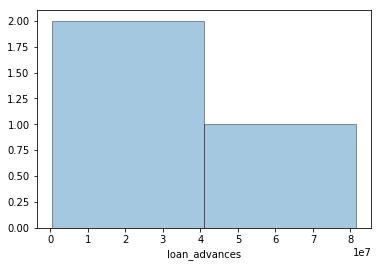

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


#sns.distplot(df['loan_advances'].dropna(), fit=norm, kde=False)
plt.rcParams["patch.force_edgecolor"] = True
sns.distplot(df['loan_advances'].dropna(), kde=False)

Given the small number of data points and the ludicrous spread in the data, this, unsurprisingly, isn't providing us much info. Let's quickly facet by our POI label, just to be thorough.

In [16]:
df[df['loan_advances'].notnull()][['loan_advances','poi']]

,loan_advances,poi
Name,,
FREVERT MARK A,2000000.0,False
LAY KENNETH L,81525000.0,True
PICKERING MARK R,400000.0,False


/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


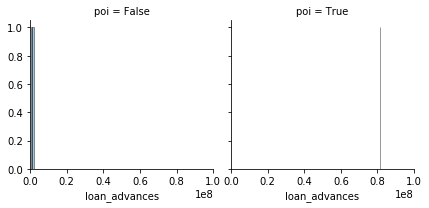

In [17]:
g = sns.FacetGrid(df, col="poi")
g = g.map(sns.distplot, "loan_advances", kde = False)
g.set(xlim=(0, 1E8))

It's interesting to note that `poi` labels are split nearly evenly (2:1) between the few records we have that are non-null for `loan_advances`, but the amount of missing values for this feature is still overwhelming and likely to not help our prediction ability if the feature is allowed to remain. That being said, the significant difference in values between the two labels is a clear trend, so as stated before we'll certainly test our predictions both with and without this feature and see what happens!

### director_fees

/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


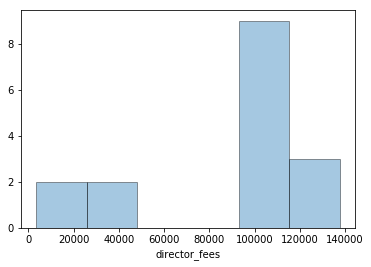

In [18]:
sns.distplot(df['director_fees'].dropna(), kde=False)

/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


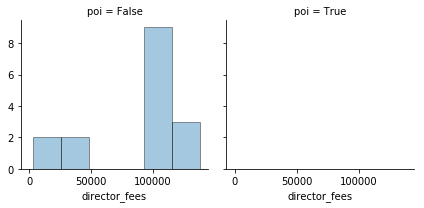

In [19]:
g = sns.FacetGrid(df, col="poi")
g = g.map(sns.distplot, "director_fees", kde = False)

**There are no obvious outliers in this one** and there's no POIs with non-null values for this feature. Also, the count of data points is low enough (and spread in value enough) that I don't see any value in performing transformations on this, so let's move on.

### restricted_stock_deferred

/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


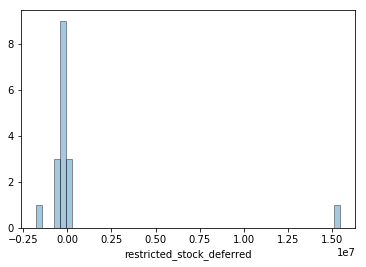

In [20]:
sns.distplot(df['restricted_stock_deferred'].dropna(), kde=False)

/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


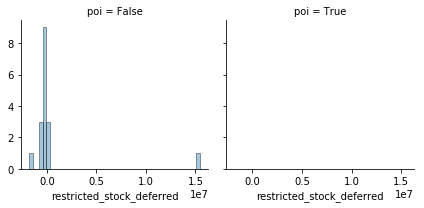

In [21]:
g = sns.FacetGrid(df, col="poi")
g = g.map(sns.distplot, "restricted_stock_deferred", kde = False)

**We've clearly got an outlier on this one,** albeit not an interesting outlier (in that it isn't a POI). Let's check it out though.

In [22]:
df[df['restricted_stock_deferred'] > 2.5E6]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
Name,,,,,,,,,,,,,,,,,,,,,
BHATNAGAR SANJAY,NaN,523.0,NaN,15456290.0,2604490.0,NaN,-2604490.0,463.0,15456290.0,NaN,...,NaN,29.0,137864.0,1.0,False,137864.0,NaN,NaN,sanjay.bhatnagar@enron.com,0.0


While this may be a really high value for deferred restricted stock, it's not inherently suspicious or an obvious flaw in the data. So we'll leave it be, as it may be usefully predictive (although unlikely, since we know that this individual outlier is labeled as not being a POI - but since we could one day use this classifier on new data, it may be a mistake to remove this outlier as it may be useful in future classifications, if we were to do them).

**Ultimately, it doesn't seem like these three features are crucial to our predictive modeling.** As I said before, the safest bet is to treat this empirically, and see how our precision and recall fair when we both include and exclude this features with lots of missing values, but my intuition at the moment is that they won't improve the results significantly (and may run the risk of causing actual detriment).

### poi
We already know from our earlier exploration that it only takes on two values (as it should) and that it is present for all records. Plus, we're already faceting all of our exploratory visualizations by this feature. Still, let's do a quick visualization to get a sense of scale.

In [23]:
df['poi'].value_counts()

False    126
True      18
Name: poi, dtype: int64

In [24]:
print "Fraction of poi's in the dataset =", float(df['poi'].value_counts()[1])/float(len(df))

Fraction of poi's in the dataset = 0.125


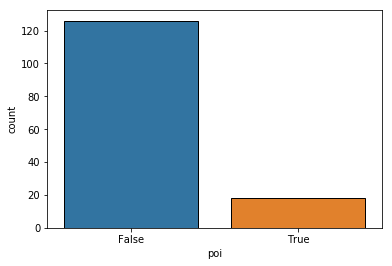

In [25]:
sns.countplot(x ='poi', data = df)

### email_address
I won't visualize this in a traditional manner, but I will look at the counts of unique values for this feature. I may be interested in using it for later feature engineering and I want to make sure that, where it isn't NaN, each entry has a unique value.

In [26]:
df['email_address'].dropna().value_counts()

danny.mccarty@enron.com         1
david.berberian@enron.com       1
john.echols@enron.com           1
dana.gibbs@enron.com            1
david.delainey@enron.com        1
rebecca.mcdonald@enron.com      1
john.buchanan@enron.com         1
kulvinder.fowler@enron.com      1
james.hughes@enron.com          1
keith.dodson@enron.com          1
kevin.garland@enron.com         1
george.wasaff@enron.com         1
david.haug@enron.com            1
rockford.meyer@enron.com        1
james.bannantine@enron.com      1
kristina.mordaunt@enron.com     1
john.wodraska@enron.com         1
adam.umanoff@enron.com          1
rex.shelby@enron.com            1
charlene.jackson@enron.com      1
chip.cox@enron.com              1
john.lavorato@enron.com         1
raymond.bowen@enron.com         1
rick.buy@enron.com              1
louise.kitchen@enron.com        1
greg.whalley@enron.com          1
michael.kopper@enron.com        1
robert.hermann@enron.com        1
greg.piper@enron.com            1
tracy.foy@enro

How many of these are duplicate, if any?

In [27]:
(df['email_address'].dropna().value_counts() > 1).sum()

0

How many of these are @enron.com?

In [28]:
df['email_address'].dropna().str.contains(r'@enron.com').sum() == len(df['email_address'].dropna())

True

Well, nevermind on my feature engineering idea. All of these are @enron.com email addresses. Bah!

### bonus

/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


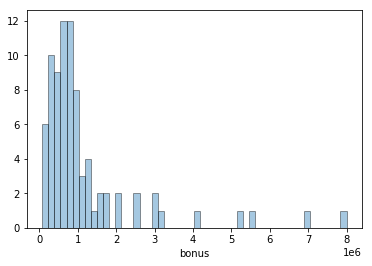

In [29]:
g = sns.distplot(df['bonus'].dropna(),kde=False, bins = 50)
#plt.xticks(rotation=90)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


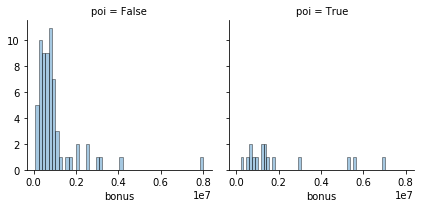

In [30]:
g = sns.FacetGrid(df, col="poi")
g = g.map(sns.distplot, "bonus", kde = False, bins = 50)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Finally, a reasonable distribution that applies to both `poi` labels! It's interesting to note here that I might have expected high bonuses to cluster around POIs, which they do somewhat, but the maximum bonus ($8M) goes to a non-POI! Obviously, our model will have to be smarter than my intuition to have high predictive validity.

Let's take a quick look at those high-bonus data.

In [31]:
df[df['bonus'] > 5E6][['bonus','poi']]

,bonus,poi
Name,,
BELDEN TIMOTHY N,5249999.0,True
LAVORATO JOHN J,8000000.0,False
LAY KENNETH L,7000000.0,True
SKILLING JEFFREY K,5600000.0,True


**Or perhaps I wasn't so off-base in my intuition after all!** It looks like 75% of the folks with bonuses above $5M are POIs. Interesting...

For the purposes of later modeling, let's do one more thing: take a look at how normally distributed these data may be.

/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(50000.0, 10000000.0)

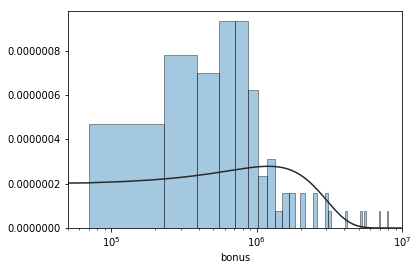

In [32]:
g = sns.distplot(df['bonus'].dropna(),kde=False, bins = 50, fit = norm)
g.set_xscale('log')
g.set_xlim([5E4,1E7])
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

This may be useful to know for later: it looks like even a $log_{10}$ transform of `bonus` doesn't produce a particularly Gaussian distribution, suggesting that I should stay away from machine learning (ML) models that require Gaussian assumptions for the features (e.g. linear models).

### deferral_payments

/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


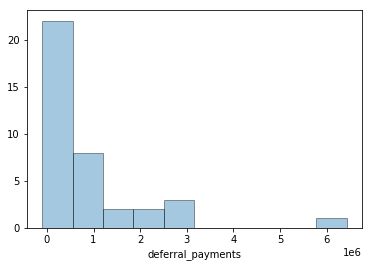

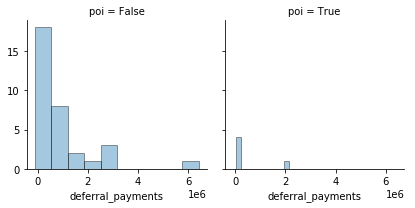

In [33]:
g = sns.distplot(df['deferral_payments'].dropna(),kde=False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

p = sns.FacetGrid(df, col="poi")
p = p.map(sns.distplot, "deferral_payments", kde = False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Nothing much to see here, this feature in particular doesn't show any obvious trend for poi vs. non-poi data. Let's quickly take a look at that outlier of $6M.

In [34]:
df[['deferral_payments','poi']].dropna().sort_values(by='deferral_payments')

,deferral_payments,poi
Name,,
BELFER ROBERT,-102500.0,False
HAYES ROBERT E,7961.0,False
HIRKO JOSEPH,10259.0,True
THORN TERENCE H,16586.0,False
COLWELL WESLEY,27610.0,True
FUGH JOHN L,50591.0,False
REYNOLDS LAWRENCE,51365.0,False
WALTERS GARETH W,53625.0,False
GAHN ROBERT S,73122.0,False


In [35]:
df.loc['FREVERT MARK A']

salary                                  1.06093e+06
to_messages                                    3275
deferral_payments                       6.42699e+06
total_payments                          1.72525e+07
exercised_stock_options                 1.04335e+07
bonus                                         2e+06
restricted_stock                        4.18867e+06
shared_receipt_with_poi                        2979
restricted_stock_deferred                       NaN
total_stock_value                       1.46222e+07
expenses                                      86987
loan_advances                                 2e+06
from_messages                                    21
other                                   7.42762e+06
from_this_person_to_poi                           6
poi                                           False
director_fees                                   NaN
deferred_income                        -3.36701e+06
long_term_incentive                     1.61701e+06
email_addres

There's nothing particularly of note about Mark Frevert, so let's keep going.

### deferred_income

/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


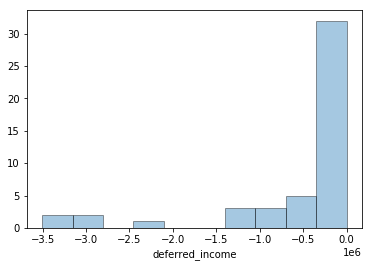

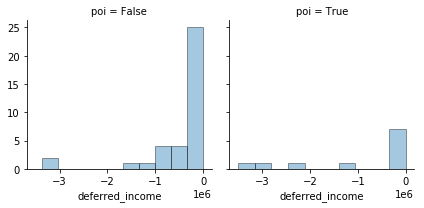

In [36]:
g = sns.distplot(df['deferred_income'].dropna(),kde=False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

p = sns.FacetGrid(df, col="poi")
p = p.map(sns.distplot, "deferred_income", kde = False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Similar to the last feature, not much of note here, although POIs do seem a bit more spread out here. 

From here on in, I'll plan to only comment when I see something of particular note in the data.

### exercised_stock_options

/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


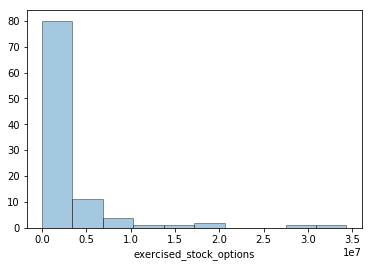

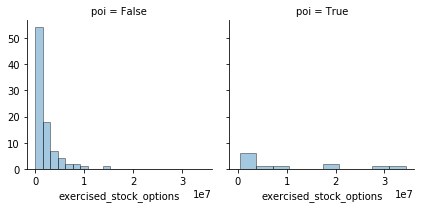

In [37]:
g = sns.distplot(df['exercised_stock_options'].dropna(),kde=False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

p = sns.FacetGrid(df, col="poi")
p = p.map(sns.distplot, "exercised_stock_options", kde = False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

### expenses

/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


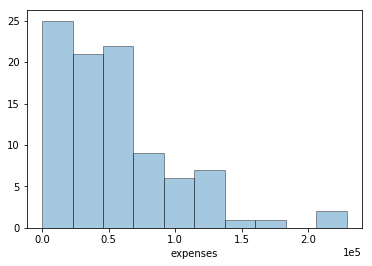

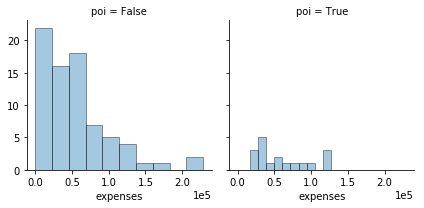

In [38]:
g = sns.distplot(df['expenses'].dropna(),kde=False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

p = sns.FacetGrid(df, col="poi")
p = p.map(sns.distplot, "expenses", kde = False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

### from_messages

/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


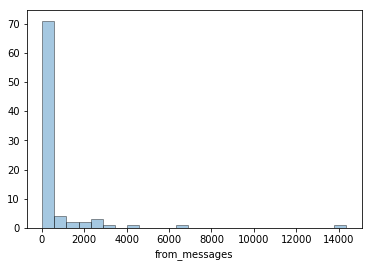

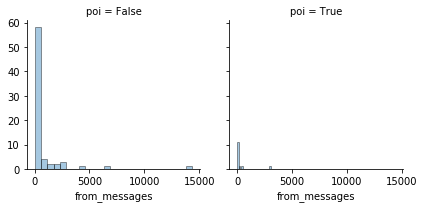

In [39]:
g = sns.distplot(df['from_messages'].dropna(),kde=False, bins = 25)

p = sns.FacetGrid(df, col="poi")
p = p.map(sns.distplot, "from_messages", kde = False, bins = 25)

In [40]:
df[df['from_messages'] > 1E4][['to_messages','from_messages']]

,to_messages,from_messages
Name,,
KAMINSKI WINCENTY J,4607.0,14368.0


Whoa! We have someone that's sent more than 14,000 messages?! That's a whole lot of emails, especially when compared to the rest of the dataset. Let's see if anything pops up for Vince in `to_messages` that may contextualize this (e.g. he also gets lots of messages to him, suggesting he might just be a popular guy and there's no data entry issues here or anything).

### to_messages



/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


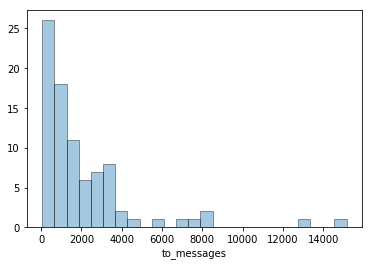

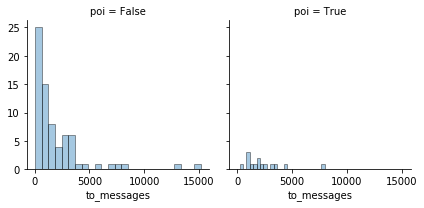

In [41]:
g = sns.distplot(df['to_messages'].dropna(),kde=False, bins = 25)

p = sns.FacetGrid(df, col="poi")
p = p.map(sns.distplot, "to_messages", kde = False, bins = 25)

In [42]:
df[df['to_messages'] > 1E4][['to_messages','from_messages']]

,to_messages,from_messages
Name,,
KEAN STEVEN J,12754.0,6759.0
SHAPIRO RICHARD S,15149.0,1215.0


This results suggest to me that it's not crazy to have a 2-3x multiplier when comparing `to_messages` to `from_messages` (at least for these 3 people), so I'm not going to worry too much about it in terms of data quality. It seems to indicate that frequency of communication isn't a very useful metric for identifying POIs though.

### from_poi_to_this_person

/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


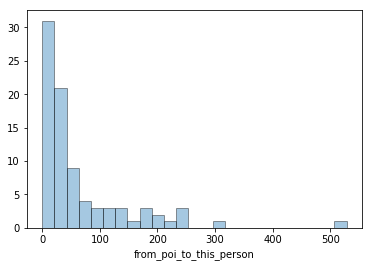

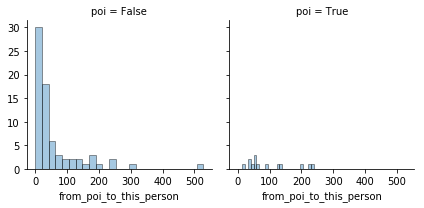

In [43]:
g = sns.distplot(df['from_poi_to_this_person'].dropna(),kde=False, bins = 25)

p = sns.FacetGrid(df, col="poi")
p = p.map(sns.distplot, "from_poi_to_this_person", kde = False, bins = 25)

In [44]:
df[df['from_poi_to_this_person'] > 400]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
Name,,,,,,,,,,,,,,,,,,,,,
LAVORATO JOHN J,339288.0,7259.0,NaN,10425757.0,4158995.0,8000000.0,1008149.0,3962.0,NaN,5167144.0,...,NaN,2585.0,1552.0,411.0,False,NaN,NaN,2035380.0,john.lavorato@enron.com,528.0


### from_this_person_to_poi



/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


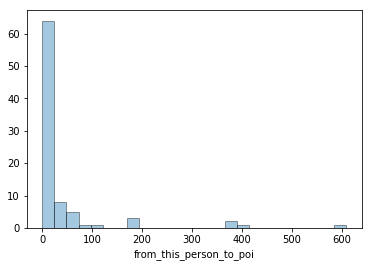

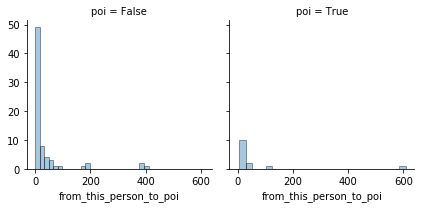

In [45]:
g = sns.distplot(df['from_this_person_to_poi'].dropna(),kde=False, bins = 25)

p = sns.FacetGrid(df, col="poi")
p = p.map(sns.distplot, "from_this_person_to_poi", kde = False, bins = 25)

In [46]:
df[df['from_this_person_to_poi'] > 300]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
Name,,,,,,,,,,,,,,,,,,,,,
BECK SALLY W,231330.0,7315.0,NaN,969068.0,NaN,700000.0,126027.0,2639.0,NaN,126027.0,...,NaN,4343.0,566.0,386.0,False,NaN,NaN,NaN,sally.beck@enron.com,144.0
DELAINEY DAVID W,365163.0,3093.0,NaN,4747979.0,2291113.0,3000000.0,1323148.0,2097.0,NaN,3614261.0,...,NaN,3069.0,1661.0,609.0,True,NaN,NaN,1294981.0,david.delainey@enron.com,66.0
KEAN STEVEN J,404338.0,12754.0,NaN,1747522.0,2022048.0,1000000.0,4131594.0,3639.0,NaN,6153642.0,...,NaN,6759.0,1231.0,387.0,False,NaN,NaN,300000.0,steven.kean@enron.com,140.0
LAVORATO JOHN J,339288.0,7259.0,NaN,10425757.0,4158995.0,8000000.0,1008149.0,3962.0,NaN,5167144.0,...,NaN,2585.0,1552.0,411.0,False,NaN,NaN,2035380.0,john.lavorato@enron.com,528.0


I'm not entirely sure what to make of this and the preceding feature, but I don't see anything standing out in a bad way that would impact our analysis. It's curious that John Lavorato would be receiving large amounts of emails from POIs and be sending a similar amount to them, while David Delainey is only sending POIs emails without receiving many in return. But perhaps that's a reflection of their job roles? For example, John might be a lawyer for Enron and his emails may solicit frequent and immediate replies, whereas David may be an internal auditor who is often sending status reports to POIs but who only gets responses when something bad shows up (although, this being Enron we're talking about, perhaps that's a bad example...).

### shared_receipt_with_poi



/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


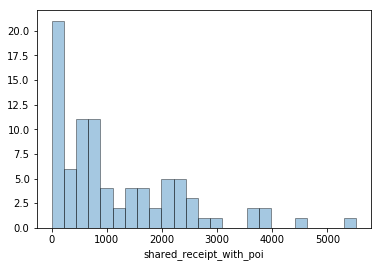

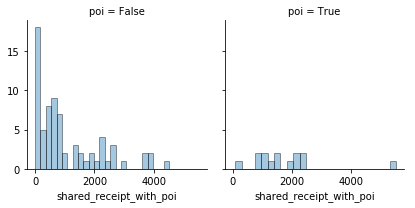

In [47]:
g = sns.distplot(df['shared_receipt_with_poi'].dropna(),kde=False, bins = 25)

p = sns.FacetGrid(df, col="poi")
p = p.map(sns.distplot, "shared_receipt_with_poi", kde = False, bins = 25)

In [48]:
df[df['shared_receipt_with_poi']>4000]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
Name,,,,,,,,,,,,,,,,,,,,,
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,NaN,1110705.0,...,NaN,484.0,210698.0,108.0,True,NaN,-2334434.0,NaN,tim.belden@enron.com,228.0
SHAPIRO RICHARD S,269076.0,15149.0,NaN,1057548.0,607837.0,650000.0,379164.0,4527.0,NaN,987001.0,...,NaN,1215.0,705.0,65.0,False,NaN,NaN,NaN,richard.shapiro@enron.com,74.0


### long_term_incentive



/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


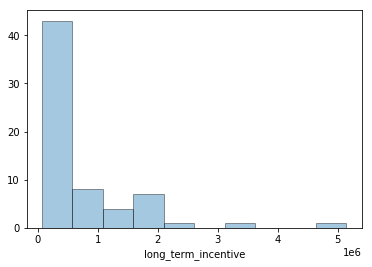

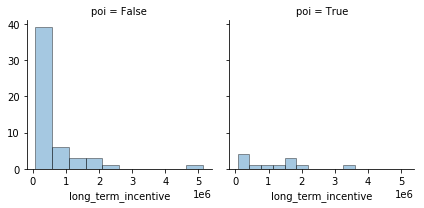

In [49]:
g = sns.distplot(df['long_term_incentive'].dropna(),kde=False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

p = sns.FacetGrid(df, col="poi")
p = p.map(sns.distplot, "long_term_incentive", kde = False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [50]:
df[df['long_term_incentive'] > 3E6]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
Name,,,,,,,,,,,,,,,,,,,,,
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,NaN,49110078.0,...,81525000.0,36.0,10359729.0,16.0,True,NaN,-300000.0,3600000.0,kenneth.lay@enron.com,123.0
MARTIN AMANDA K,349487.0,1522.0,85430.0,8407016.0,2070306.0,NaN,NaN,477.0,NaN,2070306.0,...,NaN,230.0,2818454.0,0.0,False,NaN,NaN,5145434.0,a..martin@enron.com,8.0


### other



/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


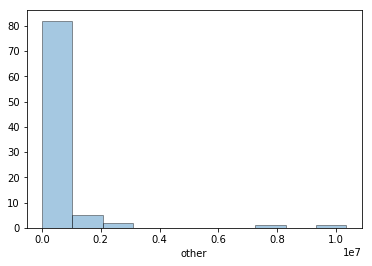

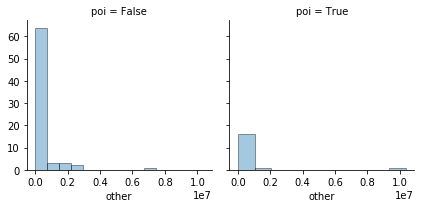

In [51]:
g = sns.distplot(df['other'].dropna(),kde=False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

p = sns.FacetGrid(df, col="poi")
p = p.map(sns.distplot, "other", kde = False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [52]:
df[df['other'] > 6E6]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
Name,,,,,,,,,,,,,,,,,,,,,
FREVERT MARK A,1060932.0,3275.0,6426990.0,17252530.0,10433518.0,2000000.0,4188667.0,2979.0,NaN,14622185.0,...,2000000.0,21.0,7427621.0,6.0,False,NaN,-3367011.0,1617011.0,mark.frevert@enron.com,242.0
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,NaN,49110078.0,...,81525000.0,36.0,10359729.0,16.0,True,NaN,-300000.0,3600000.0,kenneth.lay@enron.com,123.0


### restricted_stock



/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


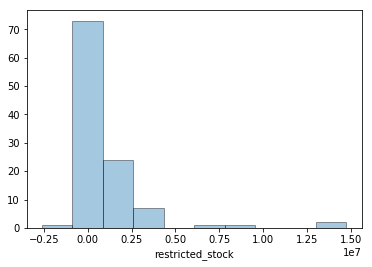

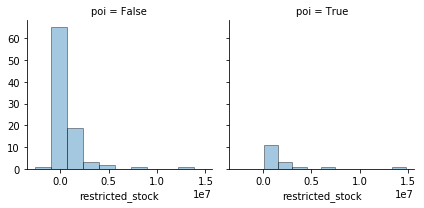

In [53]:
g = sns.distplot(df['restricted_stock'].dropna(),kde=False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

p = sns.FacetGrid(df, col="poi")
p = p.map(sns.distplot, "restricted_stock", kde = False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

### salary



/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


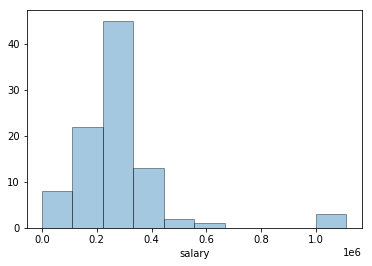

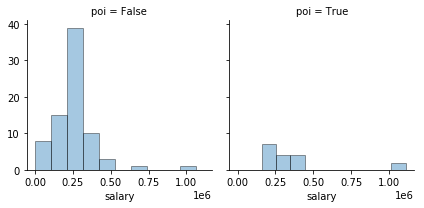

In [54]:
g = sns.distplot(df['salary'].dropna(),kde=False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

p = sns.FacetGrid(df, col="poi")
p = p.map(sns.distplot, "salary", kde = False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [55]:
df[df['salary'] > 7.5E5]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
Name,,,,,,,,,,,,,,,,,,,,,
FREVERT MARK A,1060932.0,3275.0,6426990.0,17252530.0,10433518.0,2000000.0,4188667.0,2979.0,NaN,14622185.0,...,2000000.0,21.0,7427621.0,6.0,False,NaN,-3367011.0,1617011.0,mark.frevert@enron.com,242.0
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,NaN,49110078.0,...,81525000.0,36.0,10359729.0,16.0,True,NaN,-300000.0,3600000.0,kenneth.lay@enron.com,123.0
SKILLING JEFFREY K,1111258.0,3627.0,NaN,8682716.0,19250000.0,5600000.0,6843672.0,2042.0,NaN,26093672.0,...,NaN,108.0,22122.0,30.0,True,NaN,NaN,1920000.0,jeff.skilling@enron.com,88.0


Interesting. Of all of the financial data we've looked at so far, these are the only data that look even vaguely normally-distributed. I wonder why that is? Likely because a salary is something people of many different levels within an organization typically have, while specialty categories like restricted stocks are often reserved for only higher-level employees?

### total_payments



/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


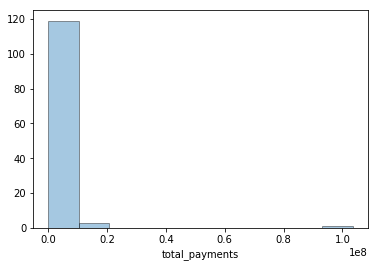

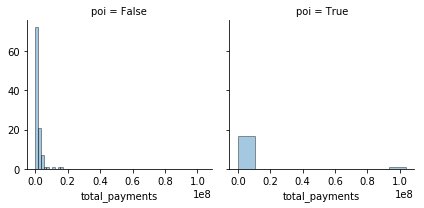

In [56]:
g = sns.distplot(df['total_payments'].dropna(),kde=False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

p = sns.FacetGrid(df, col="poi")
p = p.map(sns.distplot, "total_payments", kde = False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [57]:
df[df['total_payments'] > 6E7]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
Name,,,,,,,,,,,,,,,,,,,,,
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,NaN,49110078.0,...,81525000.0,36.0,10359729.0,16.0,True,NaN,-300000.0,3600000.0,kenneth.lay@enron.com,123.0


That's a lot of payments from the company to Kenny boy!

### total_stock_value



/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


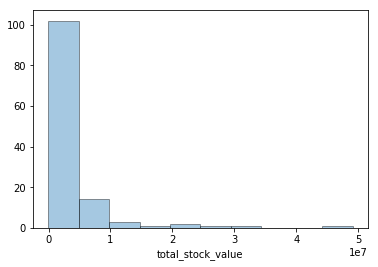

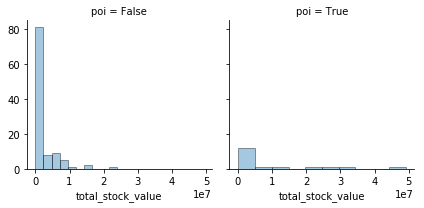

In [58]:
g = sns.distplot(df['total_stock_value'].dropna(),kde=False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

p = sns.FacetGrid(df, col="poi")
p = p.map(sns.distplot, "total_stock_value", kde = False, bins = 10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [59]:
df[df['total_stock_value']>3E7]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
Name,,,,,,,,,,,,,,,,,,,,,
HIRKO JOSEPH,NaN,NaN,10259.0,91093.0,30766064.0,NaN,NaN,NaN,NaN,30766064.0,...,NaN,NaN,2856.0,NaN,True,NaN,NaN,NaN,joe.hirko@enron.com,NaN
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,NaN,49110078.0,...,81525000.0,36.0,10359729.0,16.0,True,NaN,-300000.0,3600000.0,kenneth.lay@enron.com,123.0


At this point, I think it's fair to say that we've seen quite a mixture of results for many of these variables. I expected there to be many more clear trends in the financial data for POIs vs. non-POIs (primarily that POIs were always in the top 10% for a given financial feature) but that only proved to be true part of the time. I'm still going to use this hypothesis about financial data for feature engineering, as I *did* see this pattern holding true for some features (and thus it may still be something that survives my feature selection step), but we'll just have to run the experiment to see.

Data related to email counts were similarly mixed in results. It seemed as though I more consistently saw at least one POI in the highest levels of the distributions, but rarely was it entirely POIs that I observed. Clearly this is a good data set for modeling, given how human intuition related to these features is only partially useful!

### Data Imputation

After having done this univariate analysis with only minimal modifications to the original data, one thing is for sure: **we have lots of missing data that cannot remain missing for purposes of modeling.** In fact, if I leave the missing data as `NaN`, I won't even be able to do bivariate exploration, let alone modeling! So we need to perform imputation on the data. 

There are only a handful of common imputation methods:

1. **Listwise deletion.** This entails removing any records that have missing values. This is simple and has no nuanced statistical consequences: it's pretty clear that we're reducing $n$ and therefore statistical power, but that's it.  However, every single record in our dataset falls into this category - therefore, this is not an option.

2. **Interpolation.** This is a broad term that encapsulates a few different processes, but effectively it refers to a process in which values considered "near" to the missing value are used to fill that empty slot in the data. Backfilling and forward-filling are pretty common approaches, referring to the process of taking the last (next) known value in the data and filling in missing values that come after (before) them for back (forward) filling. Another option is to do a linear regression using only nearby data points to find the best value. These are perfectly valid methods, especially if you have a low amount of missing values for a given feature and they are randomly distributed throughout the data. In addition, it requires that the data be ordered in some fashion, such as in time series data. None of this is the case for our data, however, so this isnt' going to work either.

3. **Feature-specific replacement using descriptive statistics.** Use the mean or the median of the feature to fill in the missing values. This has the upside of maintaining the original sample mean (when filling with the mean) or maintaining the sample median (when filling with the median), but of course for whichever statistic is used to do the filling, the other one will be changed entirely.

Since we know that these data are pretty right-skewed with fairly long tails at high (absolute) values, it would be improper to take the average of each feature and use that as the imputed (replacement) value for our missing data. As such, we'll use the median for now, but of course revisit this issue if the modeling requires it.

Before we do that, though, it's become clear to me that there's little value in using features with a high percentage of missing values. I hadn't previously considered the impact of imputed data. As such, I'm going to change my threshold for dropping features from 85%+ null to 60%+, which will result in the dropping of `deferral_payments` and `deferred_income` in addition to the other features we already dropped. We'll also drop `email_address` as this doesn't provide useful information and, being a string feature, will only generate errors down the road.

In [60]:
#Have to make sure we define which columns are features and which is the labels
features = df.drop('poi', axis = 1)
features_lowNull = df_lowNull.drop('poi', axis = 1)
labels = df.loc[:, 'poi']

In [61]:
features.columns

Index([u'salary', u'to_messages', u'deferral_payments', u'total_payments',
       u'exercised_stock_options', u'bonus', u'restricted_stock',
       u'shared_receipt_with_poi', u'restricted_stock_deferred',
       u'total_stock_value', u'expenses', u'loan_advances', u'from_messages',
       u'other', u'from_this_person_to_poi', u'director_fees',
       u'deferred_income', u'long_term_incentive', u'email_address',
       u'from_poi_to_this_person'],
      dtype='object')

In [62]:
df_noNullReps = df.copy()

features.drop(['email_address'], axis = 1, inplace = True)
features_lowNull.drop(columns = ["deferral_payments", "deferred_income", "email_address"], axis = 1, inplace = True)

In [63]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median')

features.loc[:,:] = imp.fit_transform(features)
features_lowNull.loc[:,:] = imp.fit_transform(features_lowNull)

In [64]:
features.describe()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
count,1.440000e+02,144.000000,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,144.000000,1.440000e+02,1.440000e+02,144.000000,1.440000e+02,144.000000,1.440000e+02,144.000000,144.000000,1.440000e+02,1.440000e+02,144.000000
mean,2.752867e+05,1726.319444,3.848169e+05,2.417162e+06,2.463115e+06,1.004122e+06,9.757471e+05,1000.868056,-5.028715e+04,3.054270e+06,51537.666667,2.541146e+06,380.097222,3.137324e+05,27.847222,104348.763889,-2.949679e+05,5.685584e+05,52.854167
std,1.433584e+05,2035.985525,7.109448e+05,8.814474e+06,4.661818e+06,1.101518e+06,1.978655e+06,933.451449,1.309777e+06,6.131519e+06,37362.684626,6.629357e+06,1446.642152,1.126610e+06,78.868690,14277.920381,5.769801e+05,5.995757e+05,68.654193
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,3.285000e+03,7.000000e+04,-2.604490e+06,2.000000,-1.787380e+06,-4.409300e+04,148.000000,4.000000e+05,12.000000,2.000000e+00,0.000000,3285.000000,-3.504386e+06,6.922300e+04,0.000000
25%,2.396288e+05,902.500000,2.210635e+05,5.610545e+05,7.567172e+05,7.000000e+05,3.570618e+05,587.500000,-1.402640e+05,5.943612e+05,33656.500000,2.000000e+06,35.500000,2.581250e+03,5.750000,106164.500000,-1.519270e+05,4.221580e+05,25.000000
50%,2.587410e+05,1211.000000,2.210635e+05,1.101393e+06,1.297049e+06,7.500000e+05,4.410960e+05,740.500000,-1.402640e+05,1.095040e+06,46547.500000,2.000000e+06,41.000000,5.158700e+04,8.000000,106164.500000,-1.519270e+05,4.221580e+05,35.000000
75%,2.696675e+05,1623.000000,2.210635e+05,1.945668e+06,1.683580e+06,8.000000e+05,7.374560e+05,933.750000,-1.402640e+05,2.295176e+06,53328.250000,2.000000e+06,53.000000,1.485770e+05,14.000000,106164.500000,-1.519270e+05,4.221580e+05,41.250000
max,1.111258e+06,15149.000000,6.426990e+06,1.035598e+08,3.434838e+07,8.000000e+06,1.476169e+07,5521.000000,1.545629e+07,4.911008e+07,228763.000000,8.152500e+07,14368.000000,1.035973e+07,609.000000,137864.000000,-8.330000e+02,5.145434e+06,528.000000


In [65]:
features_lowNull.describe()

,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,long_term_incentive,from_poi_to_this_person
count,1.440000e+02,144.000000,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,144.000000,1.440000e+02,144.000000,144.000000,1.440000e+02,144.000000,1.440000e+02,144.000000
mean,2.752867e+05,1726.319444,2.417162e+06,2.463115e+06,1.004122e+06,9.757471e+05,1000.868056,3.054270e+06,51537.666667,380.097222,3.137324e+05,27.847222,5.685584e+05,52.854167
std,1.433584e+05,2035.985525,8.814474e+06,4.661818e+06,1.101518e+06,1.978655e+06,933.451449,6.131519e+06,37362.684626,1446.642152,1.126610e+06,78.868690,5.995757e+05,68.654193
min,4.770000e+02,57.000000,1.480000e+02,3.285000e+03,7.000000e+04,-2.604490e+06,2.000000,-4.409300e+04,148.000000,12.000000,2.000000e+00,0.000000,6.922300e+04,0.000000
25%,2.396288e+05,902.500000,5.610545e+05,7.567172e+05,7.000000e+05,3.570618e+05,587.500000,5.943612e+05,33656.500000,35.500000,2.581250e+03,5.750000,4.221580e+05,25.000000
50%,2.587410e+05,1211.000000,1.101393e+06,1.297049e+06,7.500000e+05,4.410960e+05,740.500000,1.095040e+06,46547.500000,41.000000,5.158700e+04,8.000000,4.221580e+05,35.000000
75%,2.696675e+05,1623.000000,1.945668e+06,1.683580e+06,8.000000e+05,7.374560e+05,933.750000,2.295176e+06,53328.250000,53.000000,1.485770e+05,14.000000,4.221580e+05,41.250000
max,1.111258e+06,15149.000000,1.035598e+08,3.434838e+07,8.000000e+06,1.476169e+07,5521.000000,4.911008e+07,228763.000000,14368.000000,1.035973e+07,609.000000,5.145434e+06,528.000000


In [66]:
labels.describe()

count       144
unique        2
top       False
freq        126
Name: poi, dtype: object

## Bivariate Analysis


First things first, let's take a look at the correlation coefficients across all of our features to see if there are any that are roughly collinear and thus can be reasonably removed.

Since `DataFrame.corr()` ignores NaN values, we can safely use `df_noNullReps` for this to make sure we are getting the best correlation coefficients to our knowledge.

In [67]:
df_noNullReps_corr = df_noNullReps.corr(min_periods = 10)
df_noNullReps_corr
#df_noNullReps_corr[df_noNullReps_corr > 0.90]#.sum()
#df_noNullReps_corr[df_noNullReps_corr < -0.90]#.sum()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
salary,1.000000,0.187047,0.455884,0.579260,0.607324,0.523190,0.550824,0.284995,NaN,0.614736,0.145364,NaN,-0.003541,0.606903,0.021288,0.264976,NaN,-0.353816,0.484114,0.179055
to_messages,0.187047,1.000000,0.310129,0.133834,0.079568,0.372997,0.195570,0.847990,NaN,0.120864,0.155070,NaN,0.475450,0.040580,0.568506,0.058954,NaN,-0.350815,0.134277,0.525667
deferral_payments,0.455884,0.310129,1.000000,0.066774,0.019009,0.293543,0.115088,0.356696,NaN,0.075710,0.004800,NaN,0.321947,0.385829,0.206993,-0.098428,NaN,-0.881500,0.042448,0.424101
total_payments,0.579260,0.133834,0.066774,1.000000,0.591690,0.569054,0.595728,0.191069,0.941613,0.668166,0.109798,NaN,-0.033089,0.825589,0.011556,0.230102,0.317360,-0.054404,0.518498,0.154431
exercised_stock_options,0.607324,0.079568,0.019009,0.591690,1.000000,0.506998,0.690935,0.154333,-0.051644,0.963560,0.019412,NaN,-0.066129,0.536248,-0.030101,0.503551,NaN,-0.308076,0.500016,0.160253
bonus,0.523190,0.372997,0.293543,0.569054,0.506998,1.000000,0.376992,0.549102,NaN,0.509441,0.033799,NaN,0.052725,0.376371,0.354634,0.302384,NaN,-0.411659,0.625259,0.562187
restricted_stock,0.550824,0.195570,0.115088,0.595728,0.690935,0.376992,1.000000,0.232660,-0.867102,0.855250,0.042896,NaN,0.003145,0.644357,0.049284,0.224814,NaN,-0.133895,0.635172,0.133594
shared_receipt_with_poi,0.284995,0.847990,0.356696,0.191069,0.154333,0.549102,0.232660,1.000000,NaN,0.176314,0.223495,NaN,0.230855,0.122591,0.475748,0.228313,NaN,-0.394677,0.178944,0.659264
restricted_stock_deferred,NaN,NaN,NaN,0.941613,-0.051644,NaN,-0.867102,NaN,1.000000,-0.819225,NaN,NaN,NaN,0.011672,NaN,NaN,NaN,0.173154,NaN,NaN
total_stock_value,0.614736,0.120864,0.075710,0.668166,0.963560,0.509441,0.855250,0.176314,-0.819225,1.000000,0.034707,NaN,-0.036310,0.627171,0.001289,0.366462,NaN,-0.298189,0.495485,0.146366


**It looks like the only features that are correlated with $r > 0.90$ or $r < -0.90$ are `total_stock_value` and `exercised_stock_options`, as well as `restricted_stock_deferred` and `total_payments`.** This is a little suprising actually, as I would have guessed that `restricted_stock` would also be highly correlated with `total_stock_value`. It's not unreasonably correlated, at $r = 0.855$, but it's not quite as strong of a correlation as the others. The same is true of `restricted_stock_deferred` and `restricted_stock`, as well as `deferred_income` and `deferral_payments`. It looks like, if we so desired, we could drop the following:

Feature to Keep | Feature to Drop
--- | ---
total_stock_value | exercised_stock_options
total_payments | restricted_stock_deferred

My current plan is to keep these features for now (although `restricted_stock_deferred` was already dropped earlier due to its high fraction of missing values), but since we'll be performing univariate tests to select the most useful features, I expect that they'll drop out (and if they don't, we'll know that something is possibly amiss).

OK, now let's look at pair plots to see if there are any relationships we should explore further.

In [68]:
features.columns.values

array(['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'exercised_stock_options', 'bonus', 'restricted_stock',
       'shared_receipt_with_poi', 'restricted_stock_deferred',
       'total_stock_value', 'expenses', 'loan_advances', 'from_messages',
       'other', 'from_this_person_to_poi', 'director_fees',
       'deferred_income', 'long_term_incentive',
       'from_poi_to_this_person'], dtype=object)

Text(0.5,0.98,'Financial Features Pair Plot - No Features Removed')

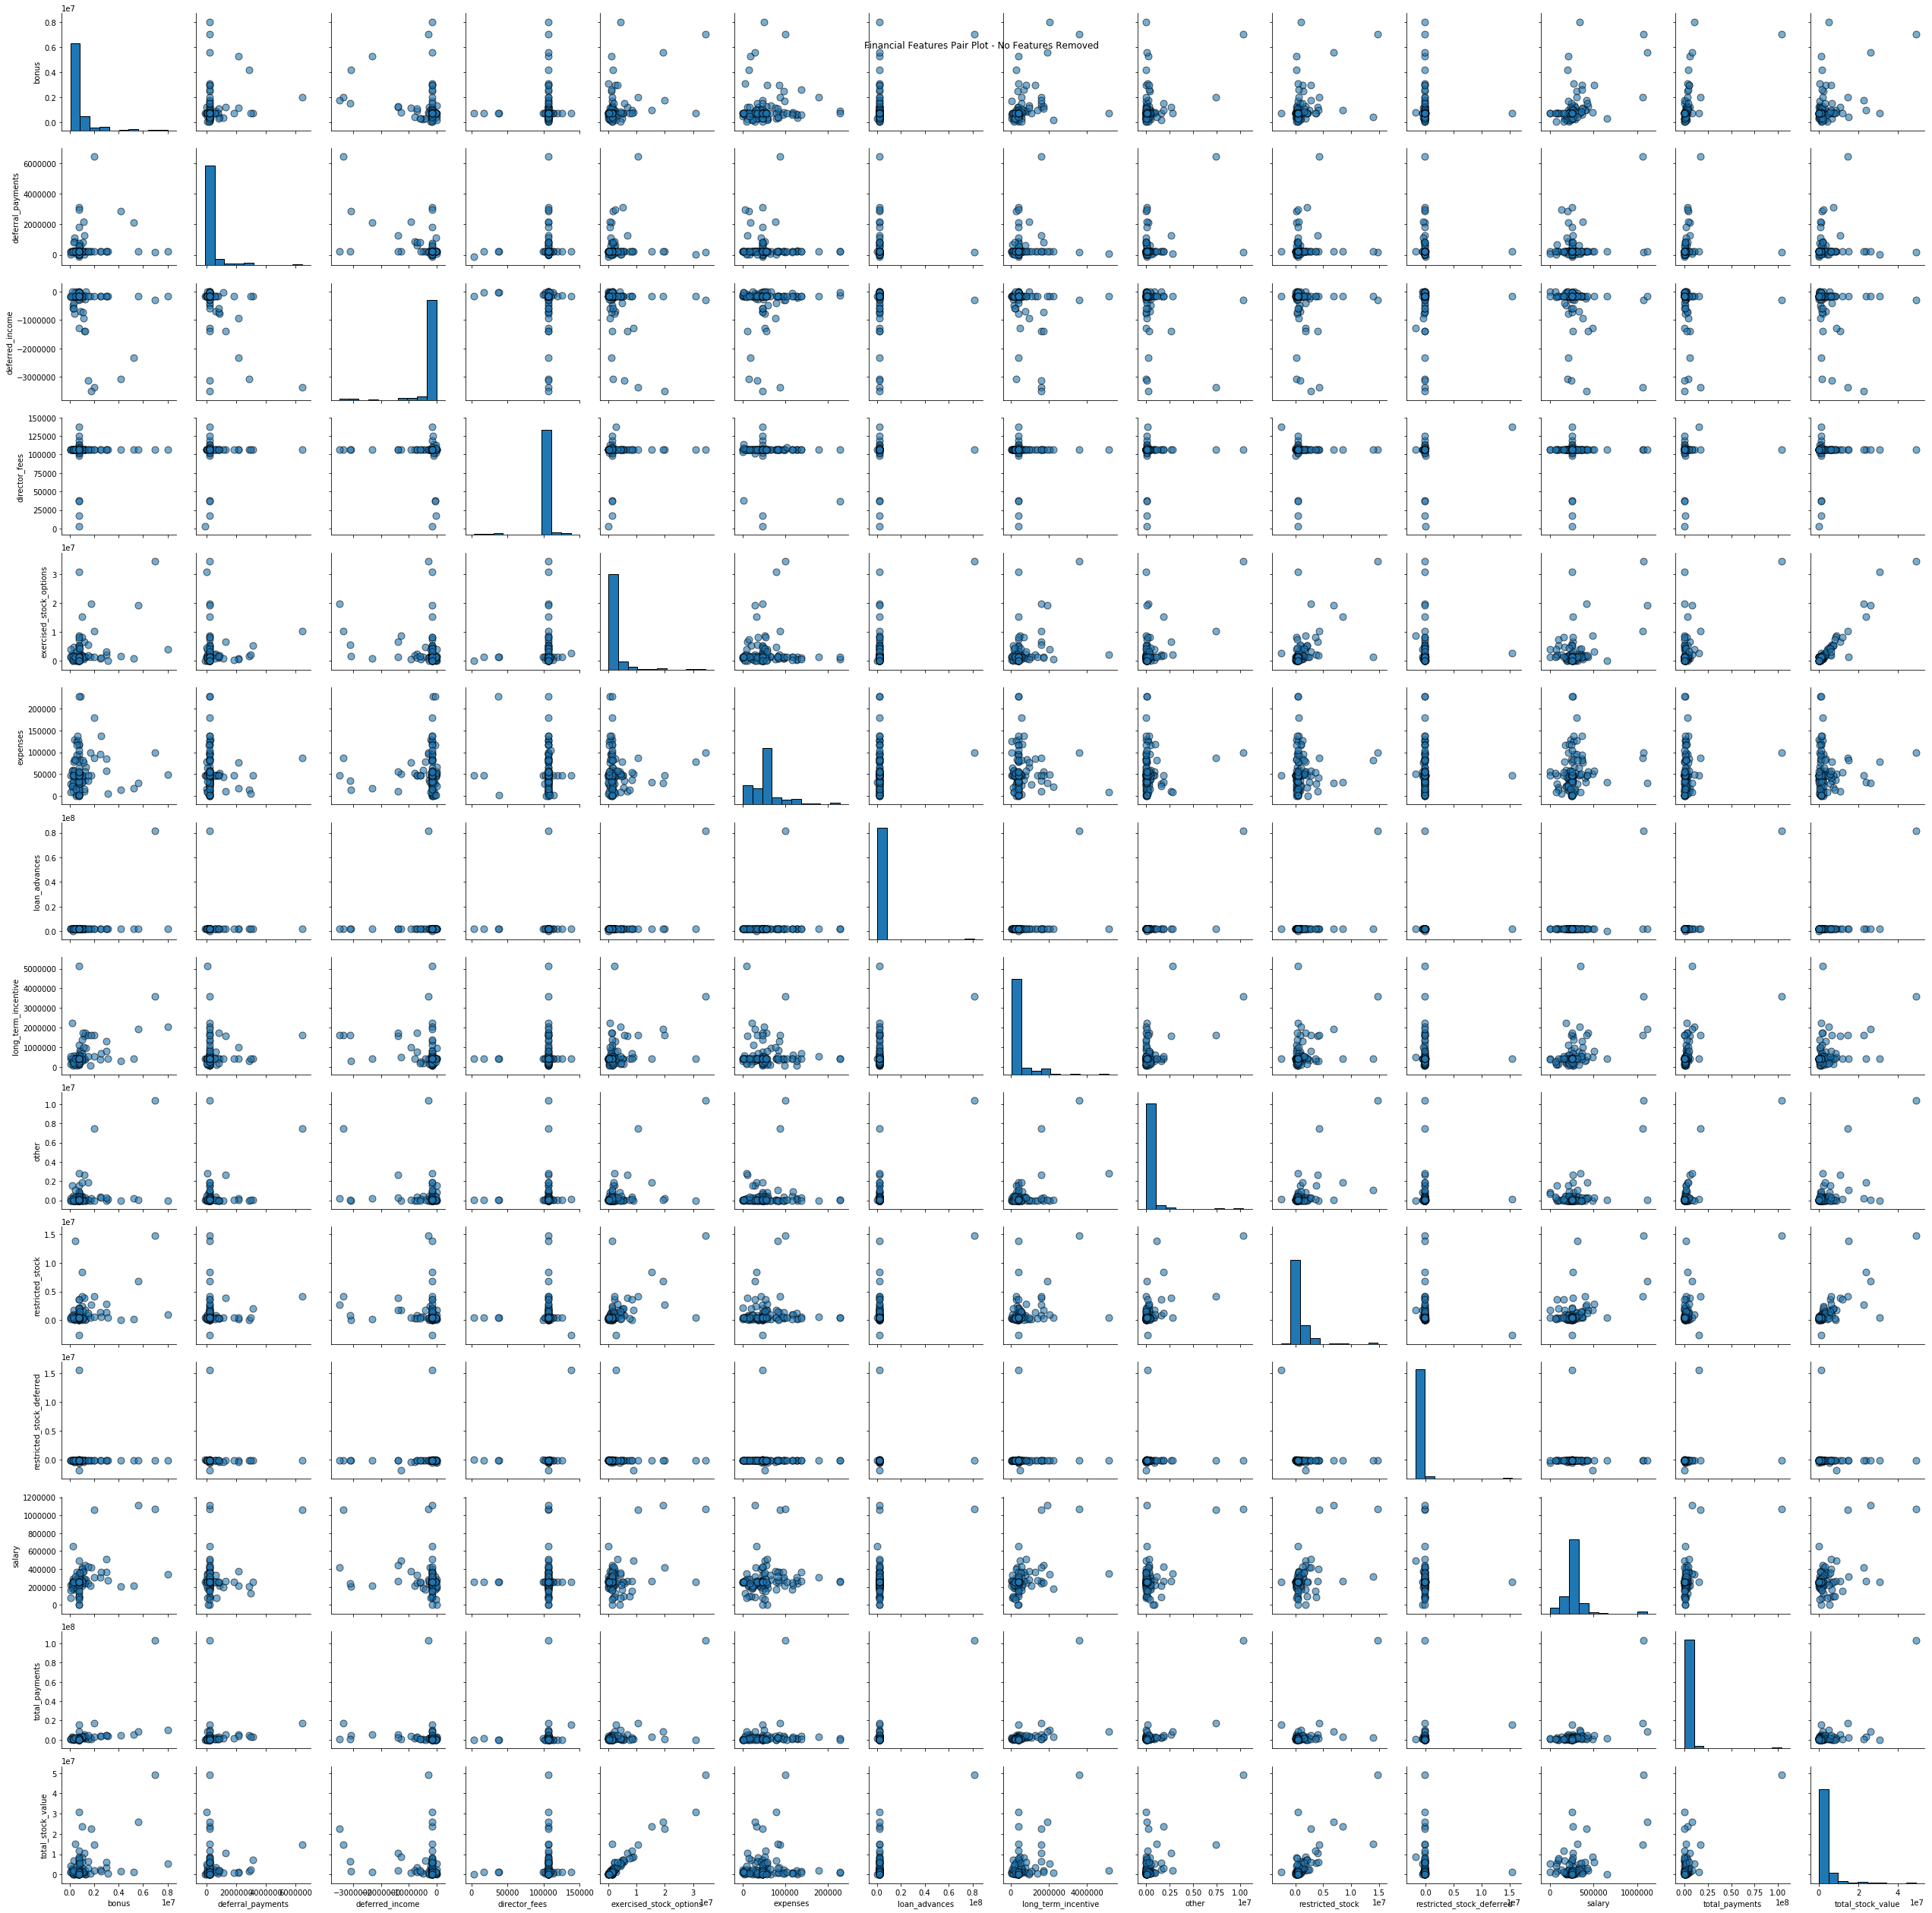

In [69]:
#For the sake of visualization and simplicity, let's just look at the financial data first, 
    #then we'll look at the email data
    
financial_feats = ['bonus', 'deferral_payments', 'deferred_income', 'director_fees',
                   'exercised_stock_options', 'expenses', 'loan_advances', 'long_term_incentive',
                   'other', 'restricted_stock', 'restricted_stock_deferred',
                   'salary', 'total_payments', 'total_stock_value']
email_feats = ['from_messages', 'from_poi_to_this_person',
               'from_this_person_to_poi', 'shared_receipt_with_poi', 'to_messages']

sns.pairplot(features[financial_feats], plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

plt.suptitle("Financial Features Pair Plot - No Features Removed")

I'm not seeing anything obvious here, other than the impact our approach of imputing with the median value has had on the data (unfortunate, but unavoidable). Let's take a look at the pair plot for the DataFrame with some high-null features removed.

Text(0.5,0.98,'Financial Features Pair Plot - High-Null Features Removed')

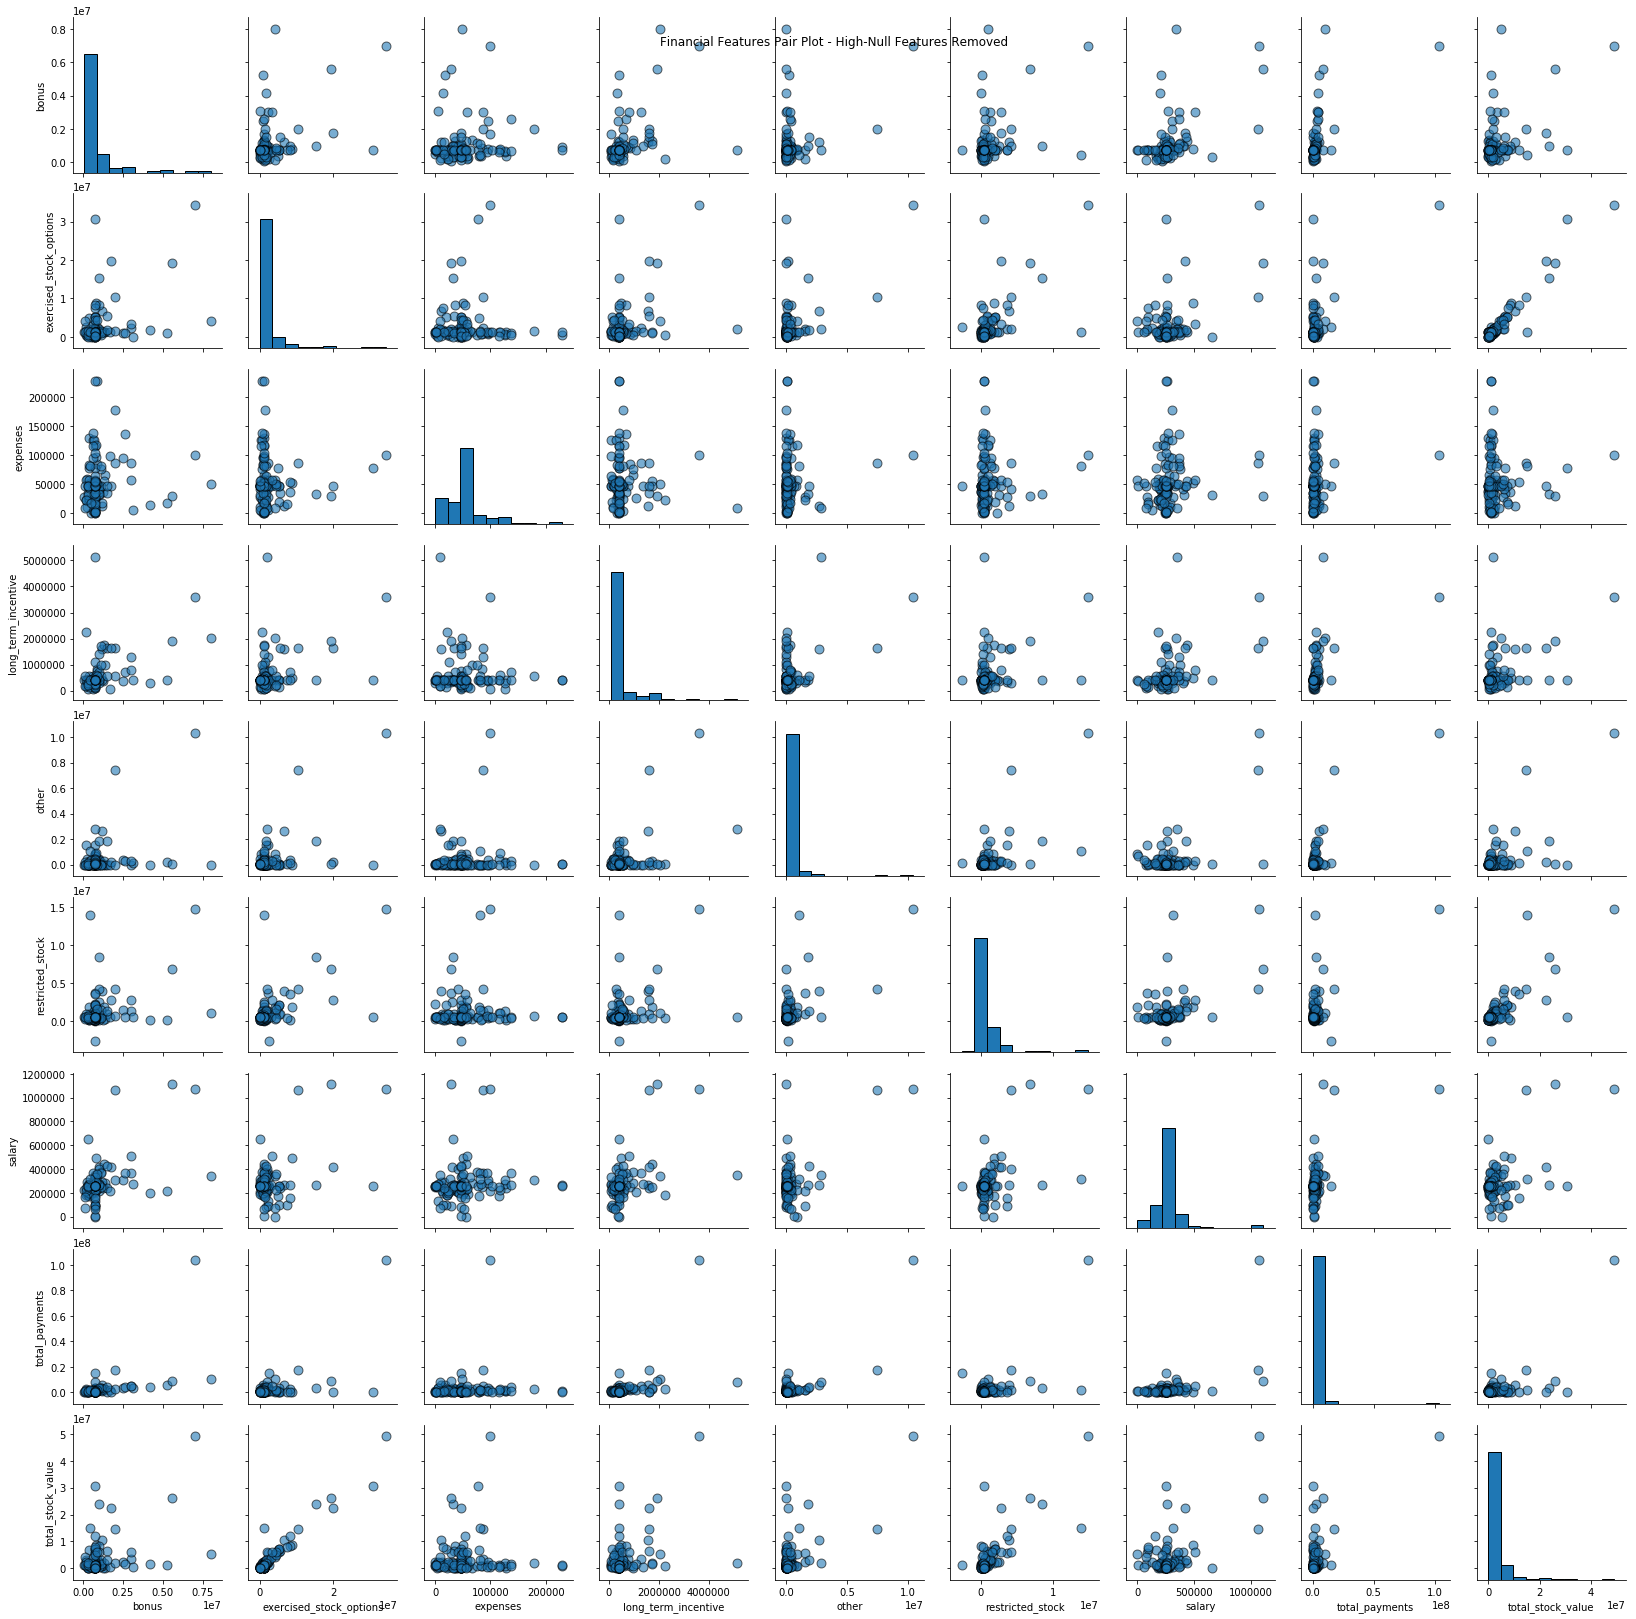

In [70]:
financial_feats_lowNull = ['bonus',
                   'exercised_stock_options', 'expenses', 'long_term_incentive',
                   'other', 'restricted_stock',
                   'salary', 'total_payments', 'total_stock_value']

sns.pairplot(features_lowNull[financial_feats_lowNull], plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

plt.suptitle("Financial Features Pair Plot - High-Null Features Removed")

As before, there's not much to say here beyond what's already been found via correlation analysis earlier. Let's look now at email-related features. We won't need to look at the high-null and low-null data separately, as we haven't dropped any email-related features (yet).

Text(0.5,0.98,'Email Features Pair Plot')

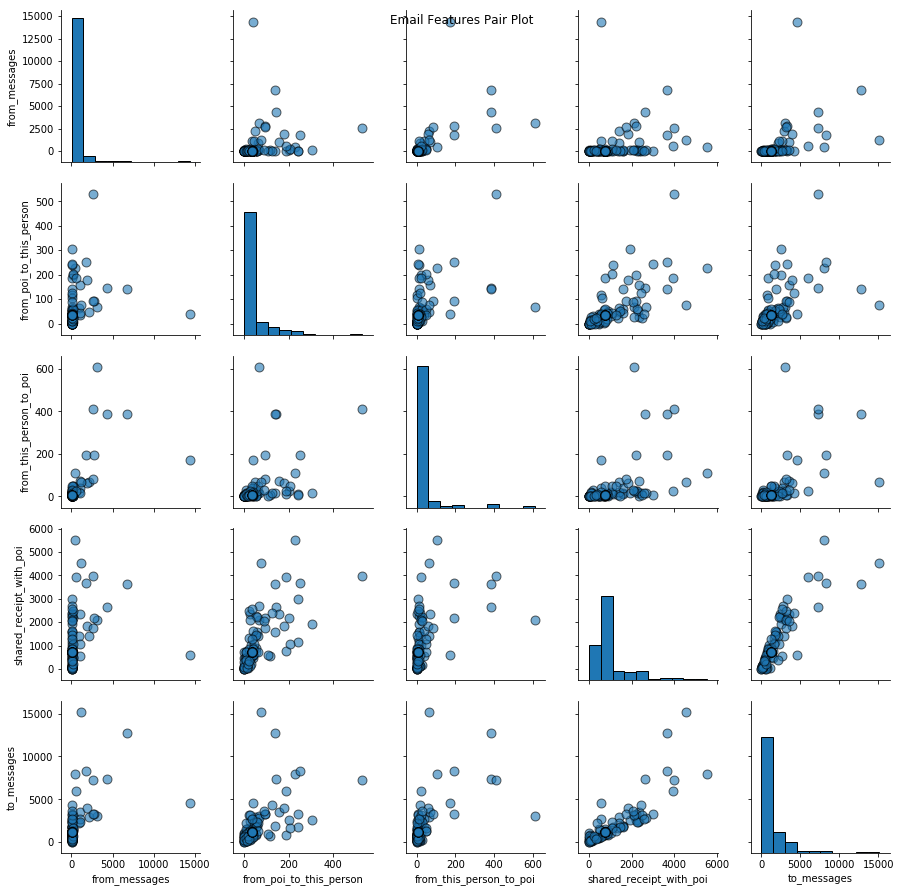

In [71]:
sns.pairplot(features[email_feats], plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

plt.suptitle("Email Features Pair Plot")

In [72]:
features[email_feats].corr()

,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages
from_messages,1.000000,0.220334,0.605102,0.264845,0.496526
from_poi_to_this_person,0.220334,1.000000,0.469716,0.675966,0.546862
from_this_person_to_poi,0.605102,0.469716,1.000000,0.500613,0.587171
shared_receipt_with_poi,0.264845,0.675966,0.500613,1.000000,0.855077
to_messages,0.496526,0.546862,0.587171,0.855077,1.000000


The relationships here aren't particularly surprising, except perhaps the fact that the only mildly-correlated features are `to_messages` and `shared_receipt_with_poi`. I'm not entirely sure what that should mean, other than people who were part of email chains involving POIs also tended to be popular receivers of email in general? Curious.

# Feature Engineering, Scaling, and Selection

## Feature Engineering

The next step in our analytical journey is to see if there are any new features we can engineer in order to increase our model's performance. The one I'm going to try out, that came to me as I was exploring the data, is a counter variable that keeps track of how many times a person has financial data in the top 10% of all values for that feature. This should be robust to my imputation approach, as that utilized the median as a fill value which is by definition the 50% breakpoint for the feature.

For example if an individual has 3 financial features that are each in the top 10%, then `top_finance = 3` for that person. **My hypothesis here is that POIs tended to be committing fraud at a grand scale and would thus have finances that reflect their lofty "ambitions."**

One thing I'm going to keep an eye on when testing this feature (assuming it survives feature selection) is whether it provides an improper level of predictive power for a single feature. I'm a little worried that, by using quantiles of all of the data in a given feature to produce this count, I'm subtly allowing for statistics leak in my workflow. In other words, I'm creating a feature that contains knowledge of all of the samples, regardless of whether they're assigned to the training or testing sets. However, given that this feature is a combination of the quantile data for a bunch of other features, this leakage is likely quite minimal in its impact on later scoring of models. Still, I'll have to keep an eye on it...

In [73]:
def quantile_checker(col, q):
    '''
    This function is meant to be used with DataFrame.apply(axis = 1). It looks at each column of a pandas DataFrame
    and compares the values in that column to the quantile values provided by quantiles. 
    It then changes all of the values in that column to False or True: 
    False if the value is less than the quantile value and True if it is greater than or equal to the quantile value. 
    
    It also takes any non-financial feature and sets all values for that feature to np.nan.
    
    It does this for every column and then sums across the rows to come up with a count for each person in the data
    as to how often they were in the top X percentile.
    
    col: pandas DataFrame column.
    q: float. Provides the quantile values you are interested in (e.g. top 10% = 0.90).
    '''
    
    #Checks to see if the values in col are majority-positive
    if abs(col.quantile(q)) > abs(col.quantile(1-q)):
        return col >= col.quantile(q)
    #Checks to see if the values in col are majority-negative
    else:
        return col <= col.quantile(1-q)

In [74]:
fin_counts = features[financial_feats].apply(quantile_checker, args = (0.9,))
features['top_finance'] = fin_counts.sum(axis=1)

fin_counts = features_lowNull[financial_feats_lowNull].apply(quantile_checker, args = (0.9,))
features_lowNull['top_finance'] = fin_counts.sum(axis=1)

In [75]:
features['top_finance'].describe()

count    144.000000
mean       4.034722
std        1.890030
min        1.000000
25%        3.000000
50%        3.000000
75%        5.000000
max       13.000000
Name: top_finance, dtype: float64

### Feature Scaling

Given that I'd like to try out a variety of models for this problem, including ones that require feature scaling to be applied (e.g. SVM or k-NN), I'm going to scale these data. The example for scaling shown in class was done using `MinMaxScaler`; I'd prefer to use `RobustScaler` as it is *robust* to outliers, doesn't assume the data are normally distributed (they're really not, even with log-transforms), and utilizes the median and IQR of each feature for centering and scaling. By virtue of utilizing the median for imputation of each feature, I've significantly impacted the mean of the features while maintaining their medians, a fact that makes `RobustScaler` particularly appealing. 

The only concern I have right now is that I might be causing "statistics leaking" by effectively using knowledge of the entire dataset's distribution to scale all of the data, regardless of their assignment to training or test groups. I guess we'll see if we get an unrealistic result for our precision and recall!

In [76]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

features_scaled = features.copy()

#Scale all of the features
features_scaled.loc[:,:] = scaler.fit_transform(features)

In [77]:
features.describe()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person,top_finance
count,1.440000e+02,144.000000,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,144.000000,1.440000e+02,1.440000e+02,144.000000,1.440000e+02,144.000000,1.440000e+02,144.000000,144.000000,1.440000e+02,1.440000e+02,144.000000,144.000000
mean,2.752867e+05,1726.319444,3.848169e+05,2.417162e+06,2.463115e+06,1.004122e+06,9.757471e+05,1000.868056,-5.028715e+04,3.054270e+06,51537.666667,2.541146e+06,380.097222,3.137324e+05,27.847222,104348.763889,-2.949679e+05,5.685584e+05,52.854167,4.034722
std,1.433584e+05,2035.985525,7.109448e+05,8.814474e+06,4.661818e+06,1.101518e+06,1.978655e+06,933.451449,1.309777e+06,6.131519e+06,37362.684626,6.629357e+06,1446.642152,1.126610e+06,78.868690,14277.920381,5.769801e+05,5.995757e+05,68.654193,1.890030
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,3.285000e+03,7.000000e+04,-2.604490e+06,2.000000,-1.787380e+06,-4.409300e+04,148.000000,4.000000e+05,12.000000,2.000000e+00,0.000000,3285.000000,-3.504386e+06,6.922300e+04,0.000000,1.000000
25%,2.396288e+05,902.500000,2.210635e+05,5.610545e+05,7.567172e+05,7.000000e+05,3.570618e+05,587.500000,-1.402640e+05,5.943612e+05,33656.500000,2.000000e+06,35.500000,2.581250e+03,5.750000,106164.500000,-1.519270e+05,4.221580e+05,25.000000,3.000000
50%,2.587410e+05,1211.000000,2.210635e+05,1.101393e+06,1.297049e+06,7.500000e+05,4.410960e+05,740.500000,-1.402640e+05,1.095040e+06,46547.500000,2.000000e+06,41.000000,5.158700e+04,8.000000,106164.500000,-1.519270e+05,4.221580e+05,35.000000,3.000000
75%,2.696675e+05,1623.000000,2.210635e+05,1.945668e+06,1.683580e+06,8.000000e+05,7.374560e+05,933.750000,-1.402640e+05,2.295176e+06,53328.250000,2.000000e+06,53.000000,1.485770e+05,14.000000,106164.500000,-1.519270e+05,4.221580e+05,41.250000,5.000000
max,1.111258e+06,15149.000000,6.426990e+06,1.035598e+08,3.434838e+07,8.000000e+06,1.476169e+07,5521.000000,1.545629e+07,4.911008e+07,228763.000000,8.152500e+07,14368.000000,1.035973e+07,609.000000,137864.000000,-8.330000e+02,5.145434e+06,528.000000,13.000000


In [78]:
features_scaled.describe()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person,top_finance
count,144.000000,144.000000,1.440000e+02,144.000000,144.000000,144.000000,144.000000,144.000000,1.440000e+02,144.000000,144.000000,1.440000e+02,144.000000,144.000000,144.000000,144.000000,1.440000e+02,1.440000e+02,144.000000,144.000000
mean,0.550811,0.715225,1.637534e+05,0.950279,1.258078,2.541224,1.405518,0.751966,8.997685e+04,1.151936,0.253672,5.411458e+05,19.376984,1.795569,2.405724,-1815.736111,-1.430409e+05,1.464004e+05,1.098718,0.517361
std,4.772450,2.825795,7.109448e+05,6.366017,5.029673,11.015181,5.201590,2.695889,1.309777e+06,3.605049,1.899307,6.629357e+06,82.665266,7.716730,9.559841,14277.920381,5.769801e+05,5.995757e+05,4.224873,0.945015
min,-8.597695,-1.601666,-3.235635e+05,-0.795345,-1.395852,-6.800000,-8.006393,-2.132852,-1.647116e+06,-0.669757,-2.358687,-1.600000e+06,-1.657143,-0.353332,-0.969697,-102879.500000,-3.352459e+06,-3.529350e+05,-2.153846,-1.000000
25%,-0.636253,-0.428175,0.000000e+00,-0.390245,-0.582968,-0.500000,-0.220914,-0.441877,0.000000e+00,-0.294376,-0.655305,0.000000e+00,-0.314286,-0.335666,-0.272727,0.000000,0.000000e+00,0.000000e+00,-0.615385,0.000000
50%,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,0.363747,0.571825,0.000000e+00,0.609755,0.417032,0.500000,0.779086,0.558123,0.000000e+00,0.705624,0.344695,0.000000e+00,0.685714,0.664334,0.727273,0.000000,0.000000e+00,0.000000e+00,0.384615,1.000000
max,28.380575,19.344899,6.205926e+06,73.997821,35.659353,72.500000,37.646726,13.806498,1.559655e+07,28.230614,9.262801,7.952500e+07,818.685714,70.605768,72.848485,31699.500000,1.510940e+05,4.723276e+06,30.338462,5.000000


Well, I didn't see this coming! It looks like `RobustScaler` may not have been the best choice, in a way, for the features with lots of imputed values. Since I used a simple replacement process with the feature medians, I have a few features wherein the 25% and 75% quartile values are equivalent. As the formula for `RobustScaler` is $\frac{x_i-Q_1(x)}{Q_3(x)-Q_1(x)}$, **we end up with a divide-by-zero issue for `RobustScaler` and thus see very large minimum and maximum values in the scaled data.** Let's take a look at our null counts again, I have a feeling that high fractions of missing values directly correlates with bad scaling.

In [79]:
(df_noNullReps.isnull().sum(axis = 0)/len(df_noNullReps)).sort_values(ascending = False)

loan_advances                0.979167
director_fees                0.888889
restricted_stock_deferred    0.881944
deferral_payments            0.736111
deferred_income              0.666667
long_term_incentive          0.548611
bonus                        0.437500
from_poi_to_this_person      0.402778
shared_receipt_with_poi      0.402778
to_messages                  0.402778
from_this_person_to_poi      0.402778
from_messages                0.402778
other                        0.368056
expenses                     0.347222
salary                       0.347222
exercised_stock_options      0.298611
restricted_stock             0.243056
email_address                0.229167
total_payments               0.145833
total_stock_value            0.131944
poi                          0.000000
dtype: float64

In [80]:
#What features (pre-scaling) have the same values for 25% and 75% quartiles?
quants_equal = features.quantile([0.25,0.75]).loc[0.25] == features.quantile([0.25,0.75]).loc[0.75]
quants_equal[quants_equal.values].index.values

array(['deferral_payments', 'restricted_stock_deferred', 'loan_advances',
       'director_fees', 'deferred_income', 'long_term_incentive'],
      dtype=object)

Here are the features with equivalent 25% and 75% quartiles, with their fractions of missing values also listed:

Feature | % Missing Values
--- | ---
deferral_payments | 73.6%
deferred_income | 66.7%
director_fees | 88.9%
loan_advances | 97.9%
long_term_incentive | 54.9%
restricted_stock_deferred | 88.2%

**Based upon these results, I think we have a good argument here for dropping `long_term_incentive` from our lowNulls features.** So that's something to keep in mind for future analyses and modeling I may do: 50% missing values (if using imputation via a constant such as the feature median) is a good cutoff for excluding features.

In [81]:
features_lowNull.drop(['long_term_incentive'], axis = 1, inplace = True)

In [82]:
features_lowNull_scaled = features_lowNull.copy()
features_lowNull_scaled.loc[:,:] = scaler.fit_transform(features_lowNull)

In [83]:
features_lowNull.describe()

,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,from_poi_to_this_person,top_finance
count,1.440000e+02,144.000000,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,144.000000,1.440000e+02,144.000000,144.000000,1.440000e+02,144.000000,144.000000,144.000000
mean,2.752867e+05,1726.319444,2.417162e+06,2.463115e+06,1.004122e+06,9.757471e+05,1000.868056,3.054270e+06,51537.666667,380.097222,3.137324e+05,27.847222,52.854167,0.944444
std,1.433584e+05,2035.985525,8.814474e+06,4.661818e+06,1.101518e+06,1.978655e+06,933.451449,6.131519e+06,37362.684626,1446.642152,1.126610e+06,78.868690,68.654193,1.629182
min,4.770000e+02,57.000000,1.480000e+02,3.285000e+03,7.000000e+04,-2.604490e+06,2.000000,-4.409300e+04,148.000000,12.000000,2.000000e+00,0.000000,0.000000,0.000000
25%,2.396288e+05,902.500000,5.610545e+05,7.567172e+05,7.000000e+05,3.570618e+05,587.500000,5.943612e+05,33656.500000,35.500000,2.581250e+03,5.750000,25.000000,0.000000
50%,2.587410e+05,1211.000000,1.101393e+06,1.297049e+06,7.500000e+05,4.410960e+05,740.500000,1.095040e+06,46547.500000,41.000000,5.158700e+04,8.000000,35.000000,0.000000
75%,2.696675e+05,1623.000000,1.945668e+06,1.683580e+06,8.000000e+05,7.374560e+05,933.750000,2.295176e+06,53328.250000,53.000000,1.485770e+05,14.000000,41.250000,1.000000
max,1.111258e+06,15149.000000,1.035598e+08,3.434838e+07,8.000000e+06,1.476169e+07,5521.000000,4.911008e+07,228763.000000,14368.000000,1.035973e+07,609.000000,528.000000,9.000000


In [84]:
features_lowNull_scaled.describe()

,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,from_poi_to_this_person,top_finance
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.550811,0.715225,0.950279,1.258078,2.541224,1.405518,0.751966,1.151936,0.253672,19.376984,1.795569,2.405724,1.098718,0.944444
std,4.772450,2.825795,6.366017,5.029673,11.015181,5.201590,2.695889,3.605049,1.899307,82.665266,7.716730,9.559841,4.224873,1.629182
min,-8.597695,-1.601666,-0.795345,-1.395852,-6.800000,-8.006393,-2.132852,-0.669757,-2.358687,-1.657143,-0.353332,-0.969697,-2.153846,0.000000
25%,-0.636253,-0.428175,-0.390245,-0.582968,-0.500000,-0.220914,-0.441877,-0.294376,-0.655305,-0.314286,-0.335666,-0.272727,-0.615385,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.363747,0.571825,0.609755,0.417032,0.500000,0.779086,0.558123,0.705624,0.344695,0.685714,0.664334,0.727273,0.384615,1.000000
max,28.380575,19.344899,73.997821,35.659353,72.500000,37.646726,13.806498,28.230614,9.262801,818.685714,70.605768,72.848485,30.338462,9.000000


OK, this looks more accurate. **The only outlier here now (in terms of maximum value) is `from_messages`.** This appears to be reflective of the extreme difference between the original data's maximum and 75% quartile values. This is a little concerning and seems to throw this feature on to a different scale than the other features (in terms of order of magnitude), but at this point I'm willing to go forward and see what the models give us.

### Feature Selection

My intent is to do a relatively simplistic univariate test for feature selection, `SelectPercentile` with the default F-value scoring function for classification tasks, `f_classif`. That being said, I did research on estimator-based (e.g. decision tree) approaches to feature selection that would allow for determination of feature importances that would then allow for ranking the features so you know what to keep and what to discard. In doing this research, I identified `sklearn.feature_selection.RFE` as the best candidate for robust, iterative feature selection using any estimator with a `coef_` or `feature_importances_` attribute. However, I decided not to go this route ultimately, as we have a relatively small number of features (15 for the dataset wherein we droppped features with high fractions of missing values, and 20 for the dataset with full features), so it didn't seem like such a complex (and likely time-consuming) approach was necessary.

In [85]:
#Only running selection of full dataset to ensure I know how the code works. When the full workflow is 
    #put into place, selection will only be done using training data

from sklearn.feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(score_func = f_classif, percentile = 75)
selector.fit(features_scaled, labels)
print "F-scores (high nulls incl.):", selector.scores_
print "\nFeatures to include (high nulls incl.):", features_scaled.iloc[:,selector.get_support(indices = True)].columns.values

selector.fit(features_lowNull_scaled, labels)
print "\n\nF-scores (lowNull):", selector.scores_
print "\nFeatures to include (lowNull):", features_lowNull_scaled.iloc[:,selector.get_support(indices = True)].columns.values

F-scores (high nulls incl.): [10.97277846  0.88638568  0.26398607  8.41363782 27.42486812 15.97960668
  8.48227706  7.47793879  0.096467   23.67759273  1.02422328  7.34777378
  0.18444789  3.9600774   2.22356161  0.33113408 10.3670465   8.48657739
  4.28482435 18.39355159]

Features to include (high nulls incl.): ['salary' 'total_payments' 'exercised_stock_options' 'bonus'
 'restricted_stock' 'shared_receipt_with_poi' 'total_stock_value'
 'expenses' 'loan_advances' 'other' 'from_this_person_to_poi'
 'deferred_income' 'long_term_incentive' 'from_poi_to_this_person'
 'top_finance']


F-scores (lowNull): [10.97277846  0.88638568  8.41363782 27.42486812 15.97960668  8.48227706
  7.47793879 23.67759273  1.02422328  0.18444789  3.9600774   2.22356161
  4.28482435 21.43396226]

Features to include (lowNull): ['salary' 'total_payments' 'exercised_stock_options' 'bonus'
 'restricted_stock' 'shared_receipt_with_poi' 'total_stock_value' 'other'
 'from_poi_to_this_person' 'top_finance']


Well this is certainly interesting. When using `SelectPercentile` on the DataFrame that hasn't had any features dropped due to high amounts of missing values (`features`), **we see that some of those high-null-fraction features were selected! Specifically, I'm referring to the features `deferred_income` and `loan_advances`.** 

That's particularly crazy when you realize that `loan_advances` originally had more than 97% of its values missing prior to imputation! Doing some experimentation, we find that you have to set the `percentile` parameter below 55% before you get rid of `loan_advances`! That's surprising, given how many of the values in that feature are imputed (and since I just did straight replacement via the median, this means that more than 97% of values in that feature *are the same value*). **To my mind, this speaks to the value of just dropping these high-null features early on, as clearly my imputation approach is influencing the selector in a way I wasn't expecting** (or my intuition about the value of these features with a lot of missing values is *seriously* flawed!).

**Likely this is reflective of the problem I identified earlier in scaling, wherein `RobustScaler` is pushing the value of features with a fraction of imputed values > 50% much higher than other feature values.** This is yet another piece of evidence that I shouldn't expect the high-null-fraction features to perform well in modeling, but we'll have to wait for the modeling step before fully ruling them out.

**At this point, I'm making a decision: I'm dropping the high-null-fraction features from my analysis.** I just don't feel comfortable using the high-null-fraction features for modeling and would like to save myself some time in the tuning and modeling steps.

In [86]:
features_lowNull_scaled = features_lowNull_scaled.iloc[:,selector.get_support(indices = True)]
features_lowNull_scaled.columns

Index([u'salary', u'total_payments', u'exercised_stock_options', u'bonus',
       u'restricted_stock', u'shared_receipt_with_poi', u'total_stock_value',
       u'other', u'from_poi_to_this_person', u'top_finance'],
      dtype='object')

In [87]:
features_lowNull_scaled.describe()

,salary,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,other,from_poi_to_this_person,top_finance
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.550811,0.950279,1.258078,2.541224,1.405518,0.751966,1.151936,1.795569,1.098718,0.944444
std,4.772450,6.366017,5.029673,11.015181,5.201590,2.695889,3.605049,7.716730,4.224873,1.629182
min,-8.597695,-0.795345,-1.395852,-6.800000,-8.006393,-2.132852,-0.669757,-0.353332,-2.153846,0.000000
25%,-0.636253,-0.390245,-0.582968,-0.500000,-0.220914,-0.441877,-0.294376,-0.335666,-0.615385,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.363747,0.609755,0.417032,0.500000,0.779086,0.558123,0.705624,0.664334,0.384615,1.000000
max,28.380575,73.997821,35.659353,72.500000,37.646726,13.806498,28.230614,70.605768,30.338462,9.000000


# Algorithm Tuning

## Pandas to NumPy Transformation
For the purposes of exploring our data, we've been working entirely in pandas DataFrames. Now that we're ready to embark upon model selection and hyperparameter tuning, it's time to switch over to numpy arrays, as this is sklearn's preferred data format.

The process we'll follow simply involves checking to make sure that each feature in the DataFrame is of a single numeric data type and that the columns aren't considered of the `object` dtype (if they are, that means there are mixed types within the column). If I do find any hetereogeneous data types within a given column, I'll have to investigate what they are and see if type casting makes sense.

In [88]:
features_lowNull_scaled.dtypes

salary                     float64
total_payments             float64
exercised_stock_options    float64
bonus                      float64
restricted_stock           float64
shared_receipt_with_poi    float64
total_stock_value          float64
other                      float64
from_poi_to_this_person    float64
top_finance                float64
dtype: object

In [89]:
labels.dtypes

dtype('bool')

It looks like we're good to go! I believe `sklearn` is able to handle the bool dtype for the labels just fine. Now to pull out the features and labels as numpy arrays.

In [90]:
features_numpy = features_lowNull_scaled.values
labels_numpy = labels.values

In [91]:
labels_numpy

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,

## Training and Testing Splitting for Cross-Validation

Now let's split up our data into a testing and training set. As mentioned earlier, I'm only going to do single-fold cross-validation for speed reasons, and then later tighten up my evaluation in my final workflow by doing 1000-fold.

As we have a pretty small number of samples (144) and a significant imbalance in the fractions of samples with different class labels (only 12.5% are POIs), and our samples are unordered, we'll use shuffled stratified splitting to preserve the fractions of different class labels in our training and testing sets. 

I'm also only going to use 10% of the data for testing, as we have such a small number of samples that I'm concerned about not having enough training data. I was thinking about doing 20% until I realized that the final testing of my model will be done with a 10% test set size for the project grading, so that seemed like the best bet.

In [92]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features_numpy, labels_numpy, 
                                                                            test_size=0.1, random_state=None, 
                                                                            shuffle = True, 
                                                                            stratify = labels_numpy)

labels_test

array([False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False])

## Evaluation and Validation

In order to spot-check the different models I'm going to try, and of course to optimize the model I ultimately choose to use, I'm going to need to define what scoring metrics I want to optimize and how I'll run my validation process. To that end, I plan to utilize the precision, recall, and f1-score. The first two are necessary for understanding my model's performance as unbalanced classes in the data disallow me from using the simple accuracy score metric. The third is useful as it's the harmonic mean of the other two (when the precision and recall are equally weighted) and thus is useful as a primary metric for optimization.

## Model Selection

First things first: I'm going to try a bunch of models with their default parameters. While this is a bit of a naive approach, we know from class that no amount of hyperparameter tuning is likely to improve a model as well as its built-in assumptions and our preprocessing of the data (and how appropriate that preprocessing was to the model at hand). Thankfully, we can iterate through a bunch of models given how relatively small our dataset is, and thus how quick I expect training and testing to go.

I'm going to start with a few models that I don't think have a high chance of performing well, mainly because I want to get them out of the way and because, quite frankly, it feels good to consistently see improving scores as I change out models!

### Gaussian Naive Bayes

This one seems to be a particularly poor fit for the job, mainly because it assumes normally-distributed features and my univariate EDA seems to indicate that that is not the state of our features. Still, it's easy to understand and implement, so what's the harm?

In [93]:
#First things first, get our scoring and reporting mechanism ready
from sklearn.metrics import classification_report
target_names = ['Not POI', 'POI']

In [94]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB(priors = None)
clf.fit(features_train, labels_train)
labels_pred = clf.predict(features_test)

print "Results for GaussianNB:\n\n", classification_report(labels_test, labels_pred, target_names=target_names)

Results for GaussianNB:

             precision    recall  f1-score   support

    Not POI       0.87      1.00      0.93        13
        POI       0.00      0.00      0.00         2

avg / total       0.75      0.87      0.80        15



/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**That could have gone better, but also could have gone worse.** As I stated before trying this one, I didn't expect miracles, so the low scores for the `poi = True` (positive) class aren't that surprising.

Oh well, on to the next model!

### k-Nearest Neighbors

Unlike NaiveBayes, this one is non-parametric (meaning that it assumes nothing about the underlying distribution of the features). I have higher hopes for this one, although it is so sensitive to local data distributions that I'm worried it will prove pretty weakly predictive.

In [95]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf.fit(features_train, labels_train)
labels_pred = clf.predict(features_test)

print "Results for kNN:\n\n", classification_report(labels_test, labels_pred, target_names=target_names)

Results for kNN:

             precision    recall  f1-score   support

    Not POI       0.87      1.00      0.93        13
        POI       0.00      0.00      0.00         2

avg / total       0.75      0.87      0.80        15



/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**I must say, this performed far better than I had expected!** I really thought that the local data structure sensitivity of kNN would result in poor performance for my data, yet here we are!

Interesting side note: if I had only used the default value for `n_neighbors` (5), I would have predicted no POIs at all! Yet changing it to 2 gave me the best result I could find when varying that parameter. Also, the performance of this model is extremely sensitive to the training/testing split. When I re-split with a new random state, my scores plummeted. Clearly this is a good argument for multi-fold cross-validation!

Surprisingly pleasant outcome! This is already quite good for the purposes of the class rubric (I only needed to get a precision and recall of at least 0.3), but why not finish the process and see if we can push that recall even higher (especially since we know things may shake out differently when we due multi-fold CV later)?

### Support Vector Machine (SVM)

SVMs are a good option as they are also non-parametric but also because they are so flexible: being able to utilize the "kernel trick" and play with so many different kernels is a boon, to be sure. As such, I'm actually going to try a few different kernels herein myself. I know, I know: I said I wouldn't do any hyperparameter tuning yet. But the difference in results can be very drastic in some models for a single parameter, so I feel like I should do at least that before ruling out a whole model (e.g. like I did by playing around with `n_neighbors` for kNN earlier).

In [96]:
from sklearn.svm import SVC
kernel_type = 'poly'
clf = SVC(kernel = kernel_type, C = 1, gamma = 'auto', degree = 3, coef0 = 0.0)
clf.fit(features_train, labels_train)
labels_pred = clf.predict(features_test)

print "Results for SVM ({}):\n\n".format(kernel_type), classification_report(labels_test, labels_pred, 
                                                                             target_names=target_names)

Results for SVM (poly):

             precision    recall  f1-score   support

    Not POI       0.86      0.92      0.89        13
        POI       0.00      0.00      0.00         2

avg / total       0.74      0.80      0.77        15



**Not as great as the kNN results, but not horrible either.** Given the large amount of parameters available for tuning (in addition to kernel type, there are 4 if you do `kernel = 'poly'` or `'sigmoid'`), it's possible that we'd find a good combination that can pump these results up. Still though, I'd be very surprised if it could perform as well as kNN, even with all of that tuning.

Interesting to note: I really didn't get very good performance at all with `kernel = 'linear'` or `'rbf'`: they both had 0 True Positives. How curious.

### Decision Tree

Decision Trees are also non-parametric, but they have a lot more flexibility than the SVM approach in that they can take on all sort of crazy shapes at the decision boundary to make the model fit the training data. No "kernel tricks" needed here. That being said, there flexibility is part of why they suffer from frequent overfitting: they've fit the training data far too well to be generalizable and their predictive power is thus quite poor. Let's see if that's a problem we suffer from!

In [97]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=5, 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                            class_weight='balanced')
clf.fit(features_train, labels_train)
labels_pred = clf.predict(features_test)

print "Results for Decision Tree:\n\n", classification_report(labels_test, labels_pred, 
                                                                                  target_names=target_names)

Results for Decision Tree:

             precision    recall  f1-score   support

    Not POI       0.83      0.77      0.80        13
        POI       0.00      0.00      0.00         2

avg / total       0.72      0.67      0.69        15



**Huh, I'm a little surprised by the lackluster performance here.** I suppose there's no reason to have assumed this would perform any better or worse than an SVM or even kNN, but still I expected either SVM or DT to do as well or better than kNN, honestly. This is something I'm starting to learn about machine learning: sometimes the simplest models can actually outperform all others! 

Now that I've stated that, let's throw out that concept altogether and try some ensemble models! First up, random forest.

### Random Forest

Random Forest improves upon the Decision Tree approach through what's known as bootstrap sampling/aggregation (or, specific to random forests, 'tree bagging'). The idea is that we generate a bunch of decision trees (a *forest*, if you will) by randomly choosing a subset of our training data with which to train each new tree. We also do this random selection approach when deciding what features will be considered for splitting at each leaf. Combined together, the multiple trees allows us to effectively "average away" the effects of overfitting that individual trees suffer from, and the bootstrapping of features and samples allows for the high correlation that would normally exist between the trees that we've randomly sampled to build. 

Since we played around with the hyperparameters a little bit earlier for the Decision Tree, let's start with those values that seemed to optimize it (for the parameters that are shared between the two models, that is).

In [98]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 50, max_depth=3, min_samples_split=2, 
                             min_samples_leaf=5, max_features='auto', 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                             class_weight='balanced')
clf.fit(features_train, labels_train)
labels_pred = clf.predict(features_test)

print "Results for Random Forest:\n\n", classification_report(labels_test, labels_pred, 
                                                                                  target_names=target_names)

Results for Random Forest:

             precision    recall  f1-score   support

    Not POI       0.85      0.85      0.85        13
        POI       0.00      0.00      0.00         2

avg / total       0.73      0.73      0.73        15



**Yikes, the performance of this one is quite dependent upon its choice of random state for bootstrapping.** The best result I saw is not the one shown right now, but there were plenty that did just as poorly. I can see the value, statistically, in a stochastic model like this one, but it really does make initial estimation like what I'm doing now pretty hard to do!

Note that the value here for `n_estimators` is way higher than the default of 10.

### AdaBoost with Decision Trees

OK, one more ensemble method and then we're done. AdaBoost with decision trees as its "weak learners" is what we'll be attempting here, although I may try one or two other estimators beyond decision trees depending upon how this goes. AdaBoost is effectively a sequential ensemble: unlike a random forest, AdaBoost is a bit more selective in how it works. It generates the first "weak learner" (in our initial case, a decision tree), checks to see how well it did fitting, then generates a new weak learner that is designed to properly classify the labels that the first one did poorly on. It proceeds like that for as long as it needs to (or to some cap value), constantly engineering a new weak learner each time to try and improve on the overall performance of the ensemble.

In [99]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3, 
                                                               min_samples_split=2, min_samples_leaf=5,
                                                              class_weight='balanced'),
                         n_estimators=1000, learning_rate=1.0)
clf.fit(features_train, labels_train)
labels_pred = clf.predict(features_test)

print "Results for AdaBoost:\n\n", classification_report(labels_test, labels_pred,
                                                         target_names=target_names)

Results for AdaBoost:

             precision    recall  f1-score   support

    Not POI       0.87      1.00      0.93        13
        POI       0.00      0.00      0.00         2

avg / total       0.75      0.87      0.80        15



/Users/emigre459/anaconda3/envs/ML_MiniProjects/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Man, this performance is unimpressive to say the least.** Now, to be fair, I read in the sklearn documentation, I believe, that AdaBoost is pretty sensitive to outliers. Given that we have plenty of those, that might provide an explanation of why we're seeing such poor performance. Still, it's disappointing - complicated models make for more tuning fun!

### Drumroll, please...

Based upon our brief search of the different models, it looks like k-Nearest Neighbors is the winner! It's really quite a simple model, so we won't have a whole lot of parameters to tune (only two, really), but still it's worth exploring it in some depth and getting the best possible performance we can. SVM performed equivalently, so we may revisit that and tune an SVM model (poly kernel) if we don't get the results we're hoping for in our full workflow with kNN. Onward!

## Hyperparameter Tuning

At this point, we'll be tuning the kNN model's parameters `n_neighbors`, `weights`, and `p`:

* The `p` parameter is one we didn't use previously in our model exploration step: it dictates whether the algorithm uses the Manhattan distance (`p = 1`) or the Euclidean distance (`p = 2`). In theory, we could also go to higher `p` values which would correspond to different power levels of the generalized Minkowski distance, but I don't really understand intuitively what those higher power values would be doing in kNN, so I prefer not to use it (I prefer to make decisions with machine learning in the same way as I do with investing: if you don't understand the technique/vehicle you're using, you shouldn't be using it).
* The `n_neighbors` parameter dictates the number of neighboring data points in the feature space that should be used by default for determining the label of the data point being investigated at any given time. For example, a value of 4 for this parameter means that the 4 nearest neighbors of each data point are used to determine what the likely label of the data points being investigated are through a simple majority voting mechanism (for a classification problem such as this one).
* The `weights` parameter can take on values of `'uniform'` or `'distance'`. The former means that all data points, regardless of their proximity to the point being investigated/voted upon, are given equal weight in the decision making process. As a result, the nearest of the near neighbors have the same influence on the label determination process as further neighbors do. When `weights = 'distance'`, the influence of neighbors is weighted by the inverse of their distance from the point being investigated. As a result, nearer neighbors have a strong influence when compared to farther neighbors.

### Validation Process for Tuning

In order to tune properly, I need to be a bit more thorough in cross-validation scheme than I was during the model selection phase of this workflow. To that end, I'm still going to use a stratified and shuffled training and testing set generation approach, but this time I'll do it 10 times over and average the resultant performance metrics.

In [100]:
#Suppress the warnings coming from GridSearchCV to reduce output messages
import warnings
import sklearn.exceptions

warnings.filterwarnings("ignore",category=sklearn.exceptions.UndefinedMetricWarning)

from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1,21,1),
              'weights': ['uniform', 'distance'],
             'p': [1,2]}

#Setup cross-validator object so we have full control over the data we're tuning with
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state = 42)

gs = GridSearchCV(KNeighborsClassifier(), param_grid, 
                   scoring = ['precision', 'recall', 'f1'], 
                  cv = cv, refit = 'f1', return_train_score = False)
knn = gs.fit(features_numpy, labels_numpy).best_estimator_

#Generate a results report
params_and_metrics = ['mean_test_f1', 'mean_test_precision', 'mean_test_recall', 
                      'param_n_neighbors', 'param_p', 'param_weights']
gridSearch_results_df = pd.DataFrame(gs.cv_results_)
gridSearch_results_df[params_and_metrics]

,mean_test_f1,mean_test_precision,mean_test_recall,param_n_neighbors,param_p,param_weights
0,0.430000,0.516667,0.40,1,1,uniform
1,0.430000,0.516667,0.40,1,1,distance
2,0.413333,0.466667,0.40,1,2,uniform
3,0.413333,0.466667,0.40,1,2,distance
4,0.266667,0.400000,0.20,2,1,uniform
5,0.430000,0.516667,0.40,2,1,distance
6,0.000000,0.000000,0.00,2,2,uniform
7,0.413333,0.466667,0.40,2,2,distance
8,0.400000,0.600000,0.30,3,1,uniform
9,0.400000,0.600000,0.30,3,1,distance


In [101]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=1,
           weights='distance')

In [102]:
gridSearch_results_df.iloc[gs.best_index_]

mean_fit_time                                                  0.000383401
mean_score_time                                                 0.00304387
mean_test_f1                                                          0.45
mean_test_precision                                                   0.65
mean_test_recall                                                      0.35
param_n_neighbors                                                        4
param_p                                                                  1
param_weights                                                     distance
params                   {u'n_neighbors': 4, u'weights': u'distance', u...
rank_test_f1                                                             1
rank_test_precision                                                      1
rank_test_recall                                                         7
split0_test_f1                                                    0.666667
split0_test_precision    

**Well this is a bit disappointing.** While $F_1=0.45$ is by no means the worst outcome, I was expecting something much higher based upon my previous single-split model exploration. While this is sufficient to pass the projct requirements (precision and recall > 0.30), I would like to get a bit more robust of an outcome. Let's see if an SVM gets us where we want to go!

In [103]:
#Value gamma defaults to 'auto' = 1/n_features = 0.1 for these data
#degree = 1 is basically the linear model with scalar multiplier gamma and an add'l intercept coef0
param_grid = {'C': np.arange(0.1, 2.0, 0.3),
             'gamma': [0.1,0.2,0.3],
             'degree': [1,2,3,4,5]}

gs = GridSearchCV(SVC(kernel = 'poly', coef0 = 0.0), param_grid, 
                   scoring = ['precision', 'recall', 'f1'], 
                  cv = cv, refit = 'f1', return_train_score = False)
svm = gs.fit(features_numpy, labels_numpy).best_estimator_

#Generate a results report
params_and_metrics = ['mean_test_f1', 'mean_test_precision', 'mean_test_recall']
for k in param_grid.keys(): params_and_metrics.append("param_" + k)
gridSearch_results_df = pd.DataFrame(gs.cv_results_)
gridSearch_results_df[params_and_metrics]

,mean_test_f1,mean_test_precision,mean_test_recall,param_C,param_degree,param_gamma
0,0.133333,0.200000,0.10,0.1,1,0.1
1,0.133333,0.200000,0.10,0.1,1,0.2
2,0.133333,0.200000,0.10,0.1,1,0.3
3,0.206667,0.233333,0.20,0.1,2,0.1
4,0.166667,0.200000,0.15,0.1,2,0.2
5,0.166667,0.200000,0.15,0.1,2,0.3
6,0.270000,0.250000,0.30,0.1,3,0.1
7,0.250000,0.300000,0.25,0.1,3,0.2
8,0.256667,0.308333,0.25,0.1,3,0.3
9,0.337143,0.306667,0.40,0.1,4,0.1


In [104]:
svm

SVC(C=0.4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [105]:
gridSearch_results_df.iloc[gs.best_index_]

mean_fit_time                                          0.00467203
mean_score_time                                        0.00335829
mean_test_f1                                             0.470476
mean_test_precision                                      0.531667
mean_test_recall                                              0.5
param_C                                                       0.4
param_degree                                                    5
param_gamma                                                   0.1
params                   {u'C': 0.4, u'gamma': 0.1, u'degree': 5}
rank_test_f1                                                    1
rank_test_precision                                             1
rank_test_recall                                                1
split0_test_f1                                                0.8
split0_test_precision                                    0.666667
split0_test_recall                                              1
split1_tes

**With the SVM, we don't get a significantly increased f1-score ($F_1=0.47$), but we do get a more balanced precision and recall.** Here are the results for our two optimized models:

Model | Precision | Recall | f1 Score
--- | --- | ---
kNN | 0.65 | 0.35 | 0.45
SVM | 0.53 | 0.5 | 0.47

So, it looks like we are able to get a result with a lower number of false positives (FP) but a higher number of False Negatives (FN) for the kNN model when compared to the SVM. So if our goal was to identify as many POIs as possible, even if we're found to be wrong in doing so for some of them later, the kNN model would be our preference, especially since its $F_1$ score is so close to the SVM model. However, if we were concerned about the consequences of naming someone as a POI incorrectly and would rather mischaracterize people as *not* being a POI more often, then we would go with the SVM. **Since I have no specific use case in mind for these results, I'll opt for the optimized SVM since it had the higher $F_1$ score.**

# (Semi-)Final Validation

OK, now we have all of our data processed, features selected, the model selected, and we've tuned said model. PHEW! Now for the final step: thorough cross-validation. I'm going to use the exact same strategy as I did during the hyperparameter tuning stage, but with 100x more iterations (total of 1,000), as this is the same strategy being used for final project testing and is clearly a thorough test of the algorithm. 

And, just in case it turns out my SVM model doesn't work out as well as I'm hoping, we've always got our kNN classifier if we need it!

In [106]:
cv = StratifiedShuffleSplit(n_splits=1000, test_size=0.1, random_state=42)

from sklearn.model_selection import cross_validate
scores = cross_validate(svm, features_numpy, labels_numpy, groups=None, 
                        scoring=['precision', 'recall', 'f1'], cv=cv, 
                        return_train_score=False)
cv_results = pd.DataFrame(scores)
cv_results.describe()

,fit_time,score_time,test_f1,test_precision,test_recall
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.004986,0.002666,0.333260,0.360900,0.349500
std,0.003285,0.002889,0.302370,0.366174,0.325124
min,0.001355,0.001669,0.000000,0.000000,0.000000
25%,0.003630,0.001862,0.000000,0.000000,0.000000
50%,0.004521,0.001987,0.400000,0.333333,0.500000
75%,0.005731,0.002273,0.571429,0.500000,0.500000
max,0.083659,0.055066,1.000000,1.000000,1.000000


**Well, it's not as great as my smaller-iteration work during parameter tuning (which achieved an f1-score for the best estimator of 0.47), but it's not terrible!** Let's quickly see if we can do better with the kNN model.

In [107]:
scores = cross_validate(knn, features_numpy, labels_numpy, groups=None, 
                        scoring=['precision', 'recall', 'f1'], cv=cv, 
                        return_train_score=False)
cv_results = pd.DataFrame(scores)
cv_results.describe()

,fit_time,score_time,test_f1,test_precision,test_recall
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.000422,0.003410,0.412371,0.526567,0.36150
std,0.000139,0.001208,0.344654,0.452211,0.31964
min,0.000331,0.002711,0.000000,0.000000,0.00000
25%,0.000350,0.002884,0.000000,0.000000,0.00000
50%,0.000370,0.003103,0.500000,0.500000,0.50000
75%,0.000433,0.003500,0.666667,1.000000,0.50000
max,0.002241,0.021775,1.000000,1.000000,1.00000


**Whoa! That made the difference apparently. It looks like our k-Nearest Neighbors model is the ultimate winner!** With a higher mean recall, precision, and f1-score, this model clearly is the better of the two. OK, that does it for me. Now let's figure out how to build everything we did here into a `Pipeline` for the final code submission...

# The Final Plan: Pipelines

At this point, I've done every step of my preprocessing and analysis end-to-end with lots of inspection at each step to ensure we were getting the output/transformations/etc. expected. However, a downside of this approach is the fact that I can have "stats leakage": since I'm working off of a single full dataset (or even just a single-fold train/test split), I can't safely do things like imputation, feature selection, etc. that depend upon the training set without leaking information from the test set into my models. Why? Because even though the first time I do this I'm not sharing information between the training and test sets, any fold beyond one that I use for final validation will be a different (likely) split of the data between training and testing than what I used for all of my preprocessinga and fitting work. For example, take my imputation method: I took the median of each feature and put that in place of missing values. Doing this with data that would at some point be part of the test set means that, at least for the fold in which that data is part of the test set, I've leaked information across the two datasets.

So how do I avoid this? sklearn Pipelines! They allow me to put all of my steps end-to-end so that I can do any amount of cross-validation, grid-searching, etc. that I want and re-run the processing every time. The only difficulty with this is feature engineering: I can't just write up a function and plop it into a Pipeline object. It needs `fit()` and `transform()` methods and all sorts of things to make it compatible with a Pipeline. So we're going to make a class for it that has all of that!

Here are the steps I plan to take to make this final workflow a reality:

1. **Import pickle file as data_dict** 
1. **Push data_dict into DataFrame**

**Pipes knn and svm - untuned classifiers**
1. **Imputation:** Effectively, I can't use the median of the data as the replacement value in imputation when I'm calculating the median using the whole dataset: I need to calculate it only on the training data and then apply it as the replacement value on the training and test sets (so never including the test data in the median calculation). This is the most appropriate way of avoiding leaking information about the test distribution into the training distribution (while they are expected to be coming from the same distribution, and thus there is an argument to be made for just taking the whole-dataset median, it feels intuitively safer and more valid to keep the training and test data statistics separate in this way).
    * No need to replace 'NaN' with np.nan when using the `Imputer` object. 
4. **Feature engineering:** since my new feature depends upon knowledge of quantiles and therefore relies upon more than a single record to produce that record's new feature value, I need to calculate the quantiles only using the training data, then pass along the quantile breakpoints to both the training and testing data for transformation.
    * Use my brand new `TopQuantile` class! (see below)
5. **Feature scaling:** use the training set to fit the data to a `scaler` object, then transform training and testing data separately using the info learned from the training data.
6. **Feature selection:** features need to be selected using *only* the training data, but of course dropping features will then affect all records equally.
7. **Hyperparameter tuning:** using 10-fold cross-validation and a similar variety of parameters as those I used in my earlier analysis, we'll find the best values for our hyperparameters (or as close as we can get).

**Pipes knn_pipe_tuned and svm_pipe_tuned**
1. **Final model validation:** run 1000-fold CV on both SVM and kNN models to determine the winner
    * Using `best_estimator_` that came as a result of hyperparameter tuning for each model


Ultimately, we must follow the maxim of machine learning: "anything that is learned, must be learned using only training data."

In [108]:
from sklearn.base import TransformerMixin, BaseEstimator

class TopQuantile(BaseEstimator, TransformerMixin):
    '''
    Engineer a new feature using the top quantile values of a given set of features. 
    
    For every value in those features, check to see if the value is within the top q-quantile
    of that feature. If so, increase the count for that sample by +1. New feature is an integer count
    of how often each sample had a value in the top q-quantile of the specified features.
    
    This class's fit(), transform(), and fit_transform() methods all assume a pandas DataFrame as input.
    '''
    
    import pandas as pd
    
    def __init__(self, new_feature_name = 'top_finance', feature_list = None, q = 0.90):
        '''
        Constructor for TopQuantile objects. 
        
        Parameters
        ----------
        new_feature_name: str. Name of the feature that will be added as a pandas DataFrame column
                            upon transformation. Only used if X is a DataFrame.
        
        feature_list: list of str or int.
            If X is a Dataframe: Names of feature columns that should be included in 
                                    the count of top quantile membership.
            If X is a 2D numpy array: Integer positions for the columns to be used
                        
        q: float. Corresponds to the percentage quantile you want to be counting for. For example,
            q = 0.90 looks at the 90% percentile (top decile).
        '''
        self.new_feature_name = new_feature_name
        self.feature_list = feature_list
        self.q = q

    def fit(self, X, y = None):
        '''
        Calculates the q-quantile properly both for features that are largely positive
        and ones that are largely negative (as DataFrame.quantile() does not do this correctly).
        For example, if most of a feature's data points are between (-1E5,0), the "top decile"
        should not be -100, it should be -1E4.
        
        Parameters
        ----------
        X: features DataFrame or numpy array, one feature per column
        y: labels DataFrame/numpy array, ignored
        '''
        
        
        if isinstance(X, pd.DataFrame):
            #Is self.feature_list something other than a list of strings?
            if not isinstance(self.feature_list[0], str):
                raise TypeError('feature_list is not a list of strings')
            
            #Majority-negative features need to check df.quantile(1-q)
                #in order to be using correct quantile value
            pos = X.loc[:,self.feature_list].quantile(self.q)
            neg = X.loc[:,self.feature_list].quantile(1.0-self.q)

            #Replace negative quantile values of neg within pos to create 
            #merged Series with proper quantile values for majority-positive
            #and majority-negative features
            pos.loc[neg < 0] = neg.loc[neg < 0]
            self.quants = pos
        
        #Are features a NumPy array?
        elif isinstance(X, np.ndarray):
            #Is self.feature_list something other than a list of int?
            if not isinstance(self.feature_list[0], int):
                raise TypeError('feature_list is not a list of integers')
            
            #Majority-negative features need to check df.quantile(1-q)
                #in order to be using correct quantile value
            pos = np.percentile(X[:, self.feature_list], self.q * 100, axis = 0)
            neg = np.percentile(X[:, self.feature_list], (1.0 - self.q) * 100, axis = 0)
            
            #It's easier to work in a DataFrame, and now we don't need to know column names,
            #so let's switch over to a DataFrame for a moment
            #pos = pd.DataFrame(pos)
            #neg = pd.DataFrame(neg)
            
            #Replace negative quantile values of neg within pos to create 
            #merged Series with proper quantile values for majority-positive
            #and majority-negative features
            pos[neg < 0] = neg[neg < 0]
            self.quants = pos
        
        else:
            raise TypeError('Features need to be either pandas DataFrame or numpy array')
            
        
        

    def transform(self, X):
        '''
        Using quantile information from fit(), adds a new feature to X that contains integer counts
        of how many times a sample had a value that was in the top q-quantile of its feature, limited
        to only features in self.feature_list
        
        Parameters
        ----------
        X: features DataFrame or numpy array, one feature per column
        
        Returns
        ----------
        If X is a DataFrame: Input DataFrame with additional column for new_feature, called self.new_feature_name
        
        If X is a 2D numpy array: same as for the DataFrame case, except is a numpy array with no column names
        
        '''
        #Change all values in X to True or False if they are or are not within the
            #top q-quantile
        if isinstance(X, pd.DataFrame):
            self.boolean = X.loc[:,self.feature_list].abs() >= self.quants.abs()

            #Sum across each row to produce the counts
            X[self.new_feature_name] = self.boolean.sum(axis = 1)
            
            
        elif isinstance(X, np.ndarray):
            self.boolean = np.absolute(X[:,self.feature_list]) >= np.absolute(self.quants)            
            X = np.vstack((X.T, np.sum(self.boolean, axis = 1))).T
            
        else:
            raise TypeError('Features need to be either pandas DataFrame or numpy array')    
        
        return X

    def fit_transform(self, X, y = None):
        '''
        Provides the identical output to running fit() and then transform() in one nice little package.
        
        Parameters
        ----------
        X: features DataFrame or 2D numpy array, one feature per column
        y: labels DataFrame, ignored
        '''
        
        self.fit(X, y)
        return self.transform(X)

In [109]:
#Step 1: import the pickle file afresh and push it to a DataFrame
import sys
import pickle
import pandas as pd

sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

'''
We'll grab all of the features except the ones we know are more than 50% missing values
Specifically, we're not going to pull in:
    1. loan_advances (97% missing)
    2. director_fees (88%)
    3. restricted_stock_deferred (87.7%)
    4. deferral_payments (73%)
    5. deferred_income (66%)
    6. long_term_incentive (54.9%)
    
Also, we won't pull in email_address as that doesn't give us any useful info
'''
features_list = ['poi', 'salary', 'total_payments', 'bonus', 
                 'total_stock_value', 
                 'expenses', 'exercised_stock_options', 'other',
                 'restricted_stock', 
                 'to_messages', 'from_poi_to_this_person', 
                 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] 

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    

df = pd.DataFrame.from_dict(data_dict, orient = 'index')
df.drop(columns = ['loan_advances', 'director_fees', 'restricted_stock_deferred',
                  'deferral_payments', 'deferred_income', 'long_term_incentive',
                  'email_address'], inplace = True)
df.replace(to_replace = "NaN", value = np.NaN, inplace = True)
df

,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,poi,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,1729541.0,13868.0,2195.0,152.0,65.0,False,47.0
BADUM JAMES P,NaN,NaN,182466.0,257817.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,False,NaN
BANNANTINE JAMES M,477.0,566.0,916197.0,4046157.0,NaN,1757552.0,465.0,5243487.0,56301.0,29.0,864523.0,0.0,False,39.0
BAXTER JOHN C,267102.0,NaN,5634343.0,6680544.0,1200000.0,3942714.0,NaN,10623258.0,11200.0,NaN,2660303.0,NaN,False,NaN
BAY FRANKLIN R,239671.0,NaN,827696.0,NaN,400000.0,145796.0,NaN,63014.0,129142.0,NaN,69.0,NaN,False,NaN
BAZELIDES PHILIP J,80818.0,NaN,860136.0,1599641.0,NaN,NaN,NaN,1599641.0,NaN,NaN,874.0,NaN,False,NaN
BECK SALLY W,231330.0,7315.0,969068.0,NaN,700000.0,126027.0,2639.0,126027.0,37172.0,4343.0,566.0,386.0,False,144.0
BELDEN TIMOTHY N,213999.0,7991.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,1110705.0,17355.0,484.0,210698.0,108.0,True,228.0
BELFER ROBERT,NaN,NaN,102500.0,3285.0,NaN,NaN,NaN,-44093.0,NaN,NaN,NaN,NaN,False,NaN
BERBERIAN DAVID,216582.0,NaN,228474.0,1624396.0,NaN,869220.0,NaN,2493616.0,11892.0,NaN,NaN,NaN,False,NaN


In [110]:
#Remove the two records we know aren't useful: 'TOTAL' and 'THE TRAVEL AGENCY IN THE PARK'
df.drop(['TOTAL', 'THE TRAVEL AGENCY IN THE PARK'], inplace = True)

In [111]:
df

,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,poi,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,1729541.0,13868.0,2195.0,152.0,65.0,False,47.0
BADUM JAMES P,NaN,NaN,182466.0,257817.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,False,NaN
BANNANTINE JAMES M,477.0,566.0,916197.0,4046157.0,NaN,1757552.0,465.0,5243487.0,56301.0,29.0,864523.0,0.0,False,39.0
BAXTER JOHN C,267102.0,NaN,5634343.0,6680544.0,1200000.0,3942714.0,NaN,10623258.0,11200.0,NaN,2660303.0,NaN,False,NaN
BAY FRANKLIN R,239671.0,NaN,827696.0,NaN,400000.0,145796.0,NaN,63014.0,129142.0,NaN,69.0,NaN,False,NaN
BAZELIDES PHILIP J,80818.0,NaN,860136.0,1599641.0,NaN,NaN,NaN,1599641.0,NaN,NaN,874.0,NaN,False,NaN
BECK SALLY W,231330.0,7315.0,969068.0,NaN,700000.0,126027.0,2639.0,126027.0,37172.0,4343.0,566.0,386.0,False,144.0
BELDEN TIMOTHY N,213999.0,7991.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,1110705.0,17355.0,484.0,210698.0,108.0,True,228.0
BELFER ROBERT,NaN,NaN,102500.0,3285.0,NaN,NaN,NaN,-44093.0,NaN,NaN,NaN,NaN,False,NaN
BERBERIAN DAVID,216582.0,NaN,228474.0,1624396.0,NaN,869220.0,NaN,2493616.0,11892.0,NaN,NaN,NaN,False,NaN


In [112]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Imputer, RobustScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np

#Suppress the warnings coming from GridSearchCV to reduce output messages
import warnings
import sklearn.exceptions

warnings.filterwarnings("ignore",category=sklearn.exceptions.UndefinedMetricWarning)

features = df.drop(columns = ['poi'])
labels = df['poi']

#--------------------------------- CROSS-VALIDATION -----------------------------------------
#Shuffled and stratified cross-validation binning for this tuning exercise
cv_100 = StratifiedShuffleSplit(n_splits=100, test_size=0.1, random_state = 42)

#--------------------------------- IMPUTATION -----------------------------------------
#Imputation using the median of each feature
imp = Imputer(missing_values='NaN', strategy='median')

#--------------------------------- FEATURE ENGINEERING -----------------------------------------
#Feature Engineering with TopQuantile() to count the top quantile financial features
feats = ['salary', 'total_payments', 'bonus', 'total_stock_value', 'expenses', 
         'exercised_stock_options', 'other', 'restricted_stock']

#Since numpy needs the columns as integer positions instead of names...
feats_loc_list = []
for e in feats:
    feats_loc_list.append(features.columns.get_loc(e))

topQ = TopQuantile(feature_list = feats_loc_list)

#--------------------------------- FEATURE SCALING -----------------------------------------
#Feature Scaling via RobustScaler()
scaler = RobustScaler()

#--------------------------------- FEATURE SELECTION -----------------------------------------
#Feature Selection via SelectPercentile(f_classif, percentile = 75)
selector = SelectPercentile(score_func = f_classif, percentile = 75)

#--------------------------------- TUNING -----------------------------------------
#FeatureUnion to keep track of kNN and SVM model results
knn = KNeighborsClassifier()
knn_param_grid = {'kNN__n_neighbors': range(1,21,1), 'kNN__weights': ['uniform', 'distance'],
                  'kNN__p': [1,2]}

svm = SVC(kernel = 'poly')
svm_param_grid = {'SVM__C': np.arange(0.1, 2.0, 0.3), 'SVM__gamma': [0.1,0.2,0.3], 
                  'SVM__degree': [1,2,3,4,5]}

#Hyperparameter tuning
#Apparently you're supposed to put the pipe in as a param for GridSearchCV, not the other way around...

knn_pipe = Pipeline([('impute', imp), ('engineer',topQ), ('scale', scaler),
                    ('select', selector), ('kNN', knn)])

knn_gs = GridSearchCV(knn_pipe, knn_param_grid, scoring = ['precision', 'recall', 'f1'], 
                      cv = cv_100, refit = 'f1', return_train_score = False)
knn_gs.fit(features, labels)
results_df_knn = pd.DataFrame(knn_gs.cv_results_)

svm_pipe = Pipeline([('impute', imp), ('engineer',topQ), ('scale', scaler),
                    ('select', selector), ('SVM', svm)])

svm_gs = GridSearchCV(svm_pipe, svm_param_grid, scoring = ['precision', 'recall', 'f1'], 
                      cv = cv_100, refit = 'f1', return_train_score = False)
svm_gs.fit(features, labels)
results_df_svm = pd.DataFrame(svm_gs.cv_results_)

In [113]:
results_df_knn.loc[knn_gs.best_index_]

mean_fit_time                                                    0.00485252
mean_score_time                                                  0.00555315
mean_test_f1                                                       0.426333
mean_test_precision                                                0.513333
mean_test_recall                                                       0.39
param_kNN__n_neighbors                                                    4
param_kNN__p                                                              1
param_kNN__weights                                                 distance
params                    {u'kNN__p': 1, u'kNN__weights': u'distance', u...
rank_test_f1                                                              1
rank_test_precision                                                       1
rank_test_recall                                                          7
split0_test_f1                                                            0
split0_test_

In [114]:
results_df_svm.loc[svm_gs.best_index_]

mean_fit_time                                                     0.0151196
mean_score_time                                                  0.00490693
mean_test_f1                                                       0.319119
mean_test_precision                                                0.334167
mean_test_recall                                                      0.345
param_SVM__C                                                            0.1
param_SVM__degree                                                         5
param_SVM__gamma                                                        0.1
params                    {u'SVM__degree': 5, u'SVM__C': 0.1, u'SVM__gam...
rank_test_f1                                                              1
rank_test_precision                                                       1
rank_test_recall                                                         26
split0_test_f1                                                          0.4
split0_test_

In [115]:
clf = knn_gs.best_estimator_
clf

Pipeline(memory=None,
     steps=[('impute', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('engineer', TopQuantile(feature_list=[0, 2, 4, 7, 8, 3, 10, 5],
      new_feature_name='top_finance', q=0.9)), ('scale', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
     ...wski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=1,
           weights='distance'))])

# Hyperparameter Tuning Results and Validation

At this point, we've run the models through tuning via GridSearchCV using our Pipelines for prepocessing every time we have a new test/train split. We did this 100 times for each model, making this a very thorough tuning exercise and pretty good for validation as well. Here are our final results:

<p style="text-align: center;"> *Hyperparameter Tuning Results* </p>
Model | Precision | Recall | f1 Score
--- | --- | ---
kNN | 0.51 | 0.39 | 0.43
SVM | 0.33 | 0.345 | 0.32

**As can be seen here, the k-Nearest Neighbors model is the clear winner, with a higher precision, recall, and f1 score than the Support Vector Machine model.** Given the high number of folds/iterations in our approach to cross-validation with this grid search method, we appear to have found the best possible estimator, which we will use as our final estimator for the validation run by the tester/grader algorithm. For a final assessment of the quality of this estimator, we'll run the tester.py algorithm and see what it spits out, recording it here for posterity.

## Results of tester.py run

Metric | Value
--- | ---
Accuracy | 0.88
Precision | 0.59
Recall | 0.355
F1 | 0.44
F2 | 0.39
Total predictions | 15000
True Positives | 710
False Positives | 484
False Negatives | 1290
True Negatives | 12516

**It looks like we're good to go** as we needed to get a precision and recall of at least 0.3 each. I still think there may be room for improvement in the future though. For example, I could add into my parameter search the quantile I use for feature engineering and the percentage of features I selected. And of course, another brainstorming session on features to engineer would likely come up with something useful as well. Still, this is respectable I think.

# Wrap-up: Project Questions

Here I'll answer the different questions posed by Udacity in the project rubric, to try and summarize what I've learned in this analysis and explain my thought process as best as I can. As I've done much of this in a Jupyter notebook, hopefully most of these questions have alreaady been answered earlier, but I'll cover them here too for the sake of completeness.

## Question 1
### Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  (relevant rubric items: “data exploration”, “outlier investigation”)

The goal of this project is to discern a method for predicting who, among the list of Enron employees for whom we have financial and/or email data, would be eventually considered a Person of Interest (POI) by the SEC investigating Enron's fraudulent activities. I could see this having been a very useful exercise for the SEC back in the early 2000s when this investigation was actually occurring, as machine learning has enabled me to take a very limited amount of information about a relatively small number of people (especially small when you consider that the final list of POIs was only 12.5% of the overall samples in our data) and use it to do a halfway decent job predicting who would become a POI. That being said, our performance here was hardly mind-blowing, but I think it was quite good given the very limited data set.

The data in question included a variety of financial data for the different individuals (e.g. director's fees they were paid, how much their Enron stock was worth, different payments they received from the company, etc.) as well as summary data about their company emails (e.g. count of messages they sent overall, number of messages they received from POIs, etc.). There were a few outliers in both kinds of data features (financial and email), but for the most part I allowed them to remain in the dataset as they did not appear to be due to errors of any kind and seemed like they were dispersed among enough different individuals that they may provide significant predictive value.

The only outliers I did remove were samples that seemed outside the scope of our project's goal or that were clearly data entry errors. For example, I removed the record for 'THE TRAVEL AGENCY IN THE PARK' because it clearly referred to a party external to Enron that was utilized as a vendor for travel services and contained very little data besides. I also removed 'TOTAL' as that was a spreadsheet import error: it simply listed the total value for every financial column, making it an extreme outlier in all of the financial data effectively (and of course, not a real person!).

## Question 2
### What features did you end up using in your POI identifier, and what selection process did you use to pick them? 

I ended up using a combination of manual and automated feature selection (`SelectPercentile`), starting from the full feature set and reducing from there. For the manual process, I first decided to drop features that contained more than 60% missing values, but eventually expanded that to features with more than 50% missing values. My initial reasoning was that genuine (non-imputed) data should be a significant majority of the features, so 60% was a reasonable value in my mind to achieve this. I expanded it to 50% because I noted that, after imputing the features' missing values using the feature-specific median (so as to maintain the IQR and median of each feature, due to the quantity of valid outliers I left in), I couldn't properly scale the features that had between 50% and 60% missing values (see below for my discussion of the feature scaling process I utilized).

After this manual selection process, I utilized `SelectPercentile` with the ANOVA scoring function `f_classif` as an automated univariate feature selector. I selected only the top 75% of features. I initially investigated the top 50% of remaining features, but decided upon 75% when I realized that 50% didn't include any email features, only financial ones. I felt that removing an entire category of features would likely remove a large amount of useful data and, given that we had so few features to begin with, this seemed like a reasonable way to trim some excess information without losing too much. The features I ended up with as a result of using `SelectPercentile` are listed in the table below, with their corresponding F-scores included. Note that the feature `top_finance` is the one that I engineered for this project, and it will be explained below.

Top 75% Features | F-Score
--- | ---
exercised_stock_options | 27.42
total_stock_value | 23.68
top_finance | 21.43
bonus | 15.98
salary | 10.97
restricted_stock | 8.48
total_payments | 8.41
shared_receipt_with_poi | 7.48
from_poi_to_this_person | 4.28
other | 3.96

*Note*: these features and scores are the result of my original single-fold testing, not my Pipeline workflow. 

### Did you have to do any scaling? Why or why not? 

As I chose not to be liberal in my removal of outlier data (only removing data that seemed erroneously entered instead of the "remove top 10% of residuals from a linear regression" approach due to the low amount of data and the relevance of each data point for each record), it became clear that feature scaling would be necessary. While some models (e.g. decision trees and ensembles of trees) are insensitive to scale mismatches across features, plenty of models (including SVM and kNN, my two highest-performing models) are sensitive to it. As I didn't want my preprocessing approach to determine what models I could use, I decided scaling was for the best. I chose to utilize `RobustScaler` for this purpose, as it is able to provide the value of scaling while preserving the impact of outliers. Unlike with `MinMaxScaler`, wherein you have a hard upper limit on the values of your scaled data in every feature (usually 1.0), `RobustScaler` is more flexible and thus can provide a more relevant comparison of truly large outliers vs. simply the maximum value of a feature that is not really an outlier unto itself.

`RobustScaler` works by centering the data using the median of the feature and then scaling the data using the feature's interquartile range (IQR), assuming you enable both its centering and scaling functionalities. By doing this scaling, I made model comparisons between the email and financial data more feasible (as the maximum email feature value was on the order of 1E4, compared to 1E6 or 1E7 for financial features).

### As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it

I chose to engineer a feature that would count up how many features for a given sample fell into the top X quantile of that feature. I chose to set X = 0.90, effectively looking at the 90% (or top) decile of each financial feature. The logic to this was that those committing fraud at Enron were likely white collar criminals with a lot of access to Enron's financial backers, financial mechanisms (e.g. stock buybacks), etc. People with this kind of access are usually company executives and, the sad truth is, in America executives tend to be significant outliers when it comes to different types of compensation relative to the rest of their company's workforce. So it stood to reason that POIs would be at the top of the financial ladders. Ultimately this feature proved to be the third-most important one via `f_classif` testing with `SelectPercentile`, after removing features with a high fraction of missing values, so it looks like my intuition was valid!

One thing to note with my approach to engineering this feature: there are some individuals in this dataset (e.g. `'BHATNAGAR SANJAY'`) who have a value for a few features that is very negative when the quantile value is positive, or vice versa. Due to the magnitude of the values for these individuals, my feature engineering code will actually consider them to be in the top quantile even if that quantile is defined by positive values and their value is negative. For example, BHATNAGAR SANJAY has -2604490.0 in `restricted_stock` and the quantile value for this feature is 1967034.8. While the value for this sample is clearly **much** less than the quantile value, my approach using the absolute value for comparisons of quantiles to feature values (in my `TopQuantile()` class) is designed to increase that individual's counter due to that feature. At first I thought this was a bug in my code, but now I think it may be a feature: those large, oppositely-signed-to-the-quantile values probably *should* be included in the "top quantile" per my definition of it. Usually such large negative values indicate that someone has leveraged a category of their compensation in order to do something (e.g. take out a loan to buy more company stock). This is still a signature of the "wheelers and dealers" in Enron that I'm trying to identify, and as such I am leaving this functionality as it is.

### In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  (relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”)

Please see the first section of this question for a response to this.

## Question 3
### What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  (relevant rubric item: “pick an algorithm”)

I chose to try a variety of (mostly non-parametric) models. I effectively used a large number of the models mentioned in the course. I mostly stayed away from parametric models as I never saw a clear distribution come out of any of the underlying features: $log_{10}$ transformations of financial features didn't yield a Gaussian result, for example. As mentioned earlier, I didn't have to worry about model sensitivity to scaling as I applied feature scaling earlier in the workflow. 

I chose to evaluate my models primarily on their $F_1$ scores, but I also paid attention to their precision and recall, largely just so I could differentiate how two models might be performing differntly even if they had roughly equivalent $F_1$ scores. I chose to test each model with a single-fold stratified and shuffled cross-validation strategy and with only slight parameter tuning. As first-blush impressions were all I cared about this early in the modeling stage, I didn't feel the need to take a multi-fold approach.

Given that this project is mainly interested in predicting the positive label (`poi = True`), the values I report here all focus on only the positive class. The performance metrics for the different models were:

Model | Precision | Recall | F1 Score
--- | --- | --- | ---
GaussianNB | 0.00 | 0.00 | 0.00
k-Nearest Neighbor | 1.00 | 0.50 | 0.67
SVM (poly kernel) | 0.50 | 0.50 | 0.50
Decision Tree | 0.25 | 0.50 | 0.33
Random Forest | 0.00 | 0.00 | 0.00
AdaBoost | 0.00 | 0.00 | 0.00

*Note:* these are the results of the single-fold analysis, not the Pipeline workflow.

Based upon this, I chose to tune only two of these models (picking two because their performance was reasonably similar): a polynomial-kernel SVM and a k-Nearest Neighbor model. More on the tuning can be found in the next question.

## Question 4
### What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  

Tuning the (hyper)parameters of a model is the process of optimizing the parameters you feed the model beyond just what it learns from the `fit(training_features, training_labels)` step. For example, in k-NN, there is an `n_neighbors` hyperparameter that is effectively asking the user "how many nearest neighbors should I include in the vote to determine the likely class of the data point I'm looking at right now?" Tuning that hyperparameter for k-NN can result in huge swings in the f1-score, and it's not even the only parameter to tune for that one (pretty simplistic) model! So you need to determine and implement a method for going through the hyperparameter space available to your model in order to figure out how you can tease out the best possible performance.

If you don't do a good job tuning your hyperparameters, you can easily take a model with reasonable performance and cause it to perform worse than another optimized model. This is what makes the model selection process so tricky: you know one model might dominate another when tuned, but when left with its default values it may appear to underperform relative to the other model. Unless you build a pipeline in which multiple relevant models all get run (and tuned) as part of your model selection process (a very time-consuming endeavor for large datasets), it's impossible to know if you've found yourself in this situation. That's why, when I went about my model selection step, I manually tweaked a few of the most performance-influencing hyperparameters for each model to make sure that any poor performance I was seeing wasn't the fault of the default hyperparameter settings.

To be fair, even though most of my answer focused on tuning the hyperparameters of the classifier, this question could be interpreted to also consider parameters like my choice of percentile for `SelectPercentile`. This isn't something I chose to tune, but it would certainly be a valid parameter to vary via my Pipeline workflow for future attempts at fine-tuning.

### How did you tune the parameters of your particular algorithm? What parameters did you tune?

I chose to do what's known as "exhaustive grid searching" for tuning my models via scikit-learn's `GridSearchCV`. I chose ranges of values for parameters I felt were the most likely to influence my performance significantly (this determination largely being made due to results observed during my quick runs for model selection) and fed these into my grid search algorithm, along with a cross-validator object to perform stratified and shuffled splitting of my testing and training sets for 10 folds. Here are the parameters I chose to tune for each model:

* k-NN
    * `n_neighbors`: I varied this in the range of 1 - 21 with integer steps
    * `weights`: I varied this between its two options for weighting the importance of a neighbor's vote: 'uniform' (no weight given due to relative location of neighbor) and 'distance' (weighted according to the inverse of the relative distance of the neighbor to the data point in question)
    * `p`: I varied this between its two most common options, 1 (Manhattan distance used) and 2 (Euclidean distance used)
             
* SVM (poly kernel)
    * `C`: I varied this between 0.1 and 2.0 in steps of 0.3. This hyperparameter effectively determines how convoluted or smooth you want the decision boundary in feature space to be. Higher values allow for a better training fit, but run the risk of overfitting. Lower values run the risk of underfitting.
    * `gamma`: this was varied from 0.1 to 0.3  in steps of 0.1. This is effectively just a scalar multiplier for the kernel function.
    * `degree`: took on the values of 1 through 5 in integer steps. This determines, specfically for the polynomial kernel I used, how high of an order/degree the polynomial is allowed to reach. So, at the highest value I used, the kernel was allowed to go up to $X^5$.
    
    
I've reproduced the results of my hyperparameter tuning here for the sake of clarity and summing things up:

<p style="text-align: center;"> *Hyperparameter Tuning Results* </p>
Model | Precision | Recall | f1 Score
--- | --- | ---
kNN | 0.51 | 0.39 | 0.43
SVM | 0.33 | 0.35 | 0.32

*Note:* these are the results of my Pipeline approach to tuning.

## Question 5
### What is validation, and what’s a classic mistake you can make if you do it wrong? 

Validation, or more specifically cross-validation, is the process of splitting your data into one or more training and testing sets. The idea is that you separate the data in this way to make sure your model has data it can be validated against (the test set) without ever having seen those data before and learned from them when the model was being created. Since the whole point of machine learning is to predict things (or probabilities of things), we can't very well use our test set to also train our model, right? While the model may not predict the test set perfectly, it certainly will do much better than it has any right to do. The ultimate goal here is to simulate situations your model will be facing later on when it is asked to make a prediction on data that it has truly never seen before and with no labels provided (because they're not known yet).

There are two classic mistakes I can think of when it comes to cross-validation. First is the most obvious: you can train your model on the same data as that which you test it on and get an artificially inflated predictive accuracy. Variants of this mistake include splitting the data into testing and training sets but then testing it on the training data (out of confusion most likely). The other classic mistake tends to be more nuanced: there are a large variety of ways to split your data, and you may not choose the most relevant strategy for the dataset on hand. For example, you may choose to randomly select samples to go into your training and testing groups, but this can be an error for time series data (if you want to predict future trends, you had better not randomly put future events into the training data!). More discussion on this approach, for these specific data, is given in the next response below.

One other item to note: the class only discussed splitting the dataset into training and testing sets, but there is another option practiced in the data science community: training-testing-validation splitting. The idea is that the validation set is a held-out subset of the overall data that is not used for **anything** else but final validation of the model. At first when I heard about this, it seemed like it was duplicative with the testing dataset, but then I realized that the testing data are used for hyperparameter tuning, and as a result they are effectively allowing for "stats leakage" into the model via the final hyperparameters chosen. However, the validation data are never exposed to the model except for the final testing phase, so they are new data that the model wasn't able to learn from. This approach was infeasible with the dataset at hand, however, given the small number of samples.

### How did you validate your analysis? 

Cross-validation can be done in a surprisingly large number of ways, and I know I've only scratched the surface. Thankfully, the folks at Udacity were kind enough to include their testing algorithm that they'll be using to generate part of my grade on this, as that exposed me to the concept of stratified cross-validation. Stratification involves more than just choosing what data will be in your test and training sets: it forces the fractions of samples with different labels/classes in each data set to be the same as the overall dataset. So in other words, if you have a binary classification situation wherein 12.5% of your samples are positively labeled and 87.5% are negatively labeled, stratification would ensure that all training and testing sets maintain this 12.5/87.5 proportion for the different classes. **In other words, stratification is an important aspect to include in your cross-validation if you have a small number of samples and the labels are unbalanced.** Now, if you have a large number of samples, even with unbalanced labels, chances are good that you'd be just fine with random selection of testing and training sets, but that was not the case for the Enron data.

I also shuffled my data as it is helpful to randomize away any bias that may exist in the training/testing splitting method. This was a valid approach to take with these data, as samples are not ordered in any meaningful way, so shuffling up the order should have no negative consequences.

For my final model validation step, I decided to use the Udacity tester algorithm and run 1000 folds then average the result of the precision, recall, and f1-score for each fold. The results of this final testing are shown in Question 6 below.

## Question 6
### Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance.

Here are the results of my final validation and evaluation of my model:

<p style="text-align: center;"> *Final Model Mean Evaluation Results for Tuned k-Nearest Neigbhors* </p>
Metric | Value
--- | ---
Accuracy | 0.88
Precision | 0.59
Recall | 0.355
F1 | 0.44
F2 | 0.39
Total predictions | 15000
True Positives | 710
False Positives | 484
False Negatives | 1290
True Negatives | 12516

While more metrics are shown here than what I used elsewhere, I chose to use the precision, recall, and f1 score throughout, starting with my model selection step all the way through to now. I was effectively trying to maximize the f1 score above all else.

Our results here indicate that we likely are seeing a lower number of False Positives than False Negatives with this model, as the precision is substantially higher than the recall. So **if we were concerned about the consequences of naming someone as a POI incorrectly and would rather mischaracterize people as not being a POI more often,** we would want to minimize our False Positive rate and thus this model might do pretty well for us. However, **if our goal were to identify as many POIs as possible, even if we're found to be wrong in doing so for some of them later, this model isn't so great,** given that our recall is low. 